Student number: c1977639

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBClassifier
import statistics 
from sklearn.metrics import  classification_report
from sklearn.metrics import  roc_auc_score

In [2]:
# load database
df =  pd.read_csv("Coursework_1_data.csv")
# print all columns in full and  prevent line break
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) 

# 1 Exploratory analysis of the dataset

Dataset presentation:

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Checking dataset type:

In [4]:
type(df)

pandas.core.frame.DataFrame

Checking dataset shape:

In [5]:
df.shape

(12330, 18)

Checking basic dataset statistics of numerical variables as they defined in the dataset:

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Checking dataset information:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Checking how many missing values exist in each feature of the dataset:

In [8]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Problem :
Identify whether or not an e-commerce visitor is going to make a purchase.

Objective:
To accurately predict the visitor' changing intention based on shopers' online activities.

Categorical columns are containing integers, boolean and object types. Transformation of their type and encoding will be required. Numerical variables have different scales, and scaling them will be needed.

"Revenue" represents visitors' purchasing intention and therefore is the dependent variable of the dataset. Thus, the problem is binary classification as "Revenue" has boolean output. The target variable contains the values of True and False. These will be encoded to 0 and 1, respectively, to meet the general expectation for binary classification where 0 represents the negative or majority(no purchase) class and 1 represents the positive or minority class (purchase).

Assessing the appropriate form of features:
Separate and store the target feature "Revenue" in "df_target" and transforming its values. False(a purchase did not happen) is transformed to 0, True(a purchase did happen) is transformed to 1. Separate and store the predictors of the target variable into categorical and numerical. Categorical predictors are stored in "df_categorical", and their type was transformed to "category" type. Numerical predictors are stored in "df_numerical". 

In [9]:
df['Weekend']= df['Weekend'].replace({True:'Yes',False:'No'})
df['Revenue']= df['Revenue'].replace({True:1,False:0})
               
      
df_numerical= df.drop(columns=["Month","OperatingSystems","Browser",
                               "Region","TrafficType","VisitorType","Weekend","Revenue"])
df_categorical=df.drop(columns=["Administrative","Administrative_Duration","Informational",
                                "Informational_Duration","ProductRelated","ProductRelated_Duration",
                                "BounceRates","ExitRates","PageValues","SpecialDay","Revenue"])   

df_target=pd.DataFrame(df["Revenue"].astype(int)) 

for i in df_categorical.columns:
        df_categorical[i] = df_categorical[i].astype(str).astype("category")
        
    
print("Categorical predictors information:")
print("")
print(df_categorical.info())
print("")
print(df_categorical.columns)
print("")
print(type(df_categorical))
print("")

print("Numerical predictors information:")
print("")
print(df_numerical.info())
print("")
print(df_numerical.columns)
print("")
print(type(df_numerical))
print("")


print("Target variable information:")
print("")
print(df_target.info())
print("")
print(df_target.columns)
print("")
print(type(df_target))

Categorical predictors information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Month             12330 non-null  category
 1   OperatingSystems  12330 non-null  category
 2   Browser           12330 non-null  category
 3   Region            12330 non-null  category
 4   TrafficType       12330 non-null  category
 5   VisitorType       12330 non-null  category
 6   Weekend           12330 non-null  category
dtypes: category(7)
memory usage: 87.3 KB
None

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>

Numerical predictors information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ----

## 1.1.1 Target variable

Visualise the occurrence of the target variable. Count its values based on its attributes 0 and 1 and their percentages. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


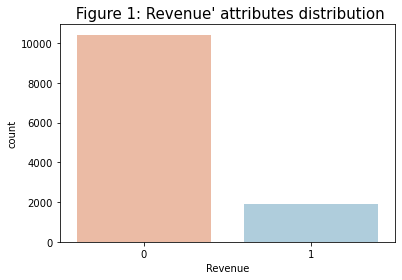

Target variable consiste of :
 0    10422
1     1908
Name: Revenue, dtype: int64
The persentages of each target atribute are:
 Revenue
0    84.525547
1    15.474453
dtype: float64


In [10]:
#Visualise target variable
sns.countplot("Revenue",data=df_target, palette="RdBu")
plt.title(" Figure 1: Revenue' attributes distribution", fontsize=15 )
plt.show()
       
#Count the values of each attribute of the target variable
print("Target variable consiste of :\n",df_target["Revenue"].value_counts())

#Data percentage of the target variable 
print("The persentages of each target atribute are:\n",df_target.groupby(['Revenue']).size() / df.shape[0]*100)

Inference:

15.5 % of transactions are purchased, and 84.5% of the transactions did not lead to a purchase. The distribution of the target variable showed a highly imbalanced dataset. We should choose the appropriate techniques to avoid this problem while applying machine learning algorithms.

In the further analysis, we will try to identify which features are more likely to trigger the customer’s decision to purchase or not and assess their importance and usefulness.

##  1.2.1 Categorical predictors

In [11]:
df_categorical.head()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,Feb,1,1,1,1,Returning_Visitor,No
1,Feb,2,2,1,2,Returning_Visitor,No
2,Feb,4,1,9,3,Returning_Visitor,No
3,Feb,3,2,2,4,Returning_Visitor,No
4,Feb,3,3,1,4,Returning_Visitor,Yes


Explore all labels in each categorical predictor:

In [12]:
for i in df_categorical:
    print(i)
    print(df_categorical[i].unique())
    print("")

Month
['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']
Categories (10, object): ['Feb', 'Mar', 'May', 'Oct', ..., 'Aug', 'Nov', 'Sep', 'Dec']

OperatingSystems
['1', '2', '4', '3', '7', '6', '8', '5']
Categories (8, object): ['1', '2', '4', '3', '7', '6', '8', '5']

Browser
['1', '2', '3', '4', '5', ..., '8', '9', '12', '13', '11']
Length: 13
Categories (13, object): ['1', '2', '3', '4', ..., '9', '12', '13', '11']

Region
['1', '9', '2', '3', '4', '5', '6', '7', '8']
Categories (9, object): ['1', '9', '2', '3', ..., '5', '6', '7', '8']

TrafficType
['1', '2', '3', '4', '5', ..., '18', '19', '16', '17', '20']
Length: 20
Categories (20, object): ['1', '2', '3', '4', ..., '19', '16', '17', '20']

VisitorType
['Returning_Visitor', 'New_Visitor', 'Other']
Categories (3, object): ['Returning_Visitor', 'New_Visitor', 'Other']

Weekend
['No', 'Yes']
Categories (2, object): ['No', 'Yes']



### 1.2.2 Univariate analysis

Visualise the occurrence of the attributes of each categorical predictor. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


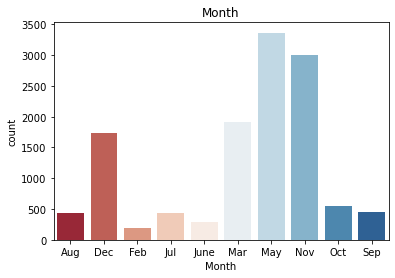

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


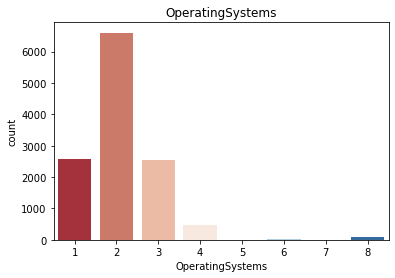

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


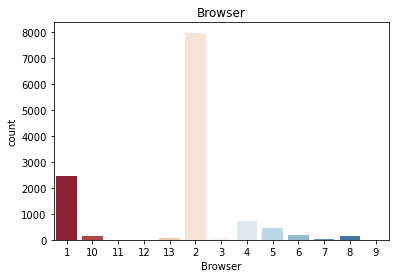

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


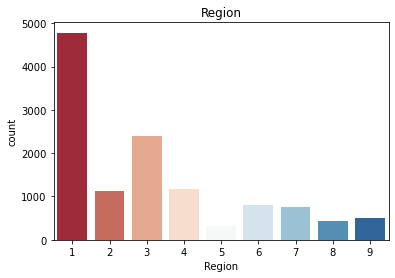

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


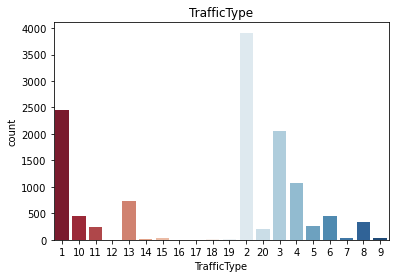

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


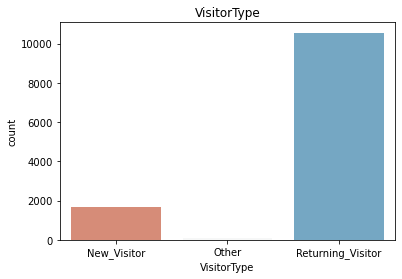

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


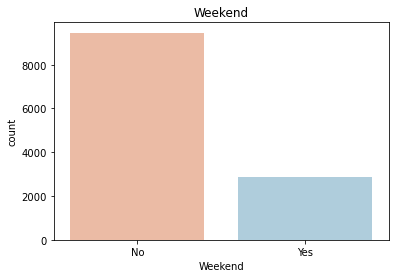

In [13]:
#Visualise categorical predictors
for i in df_categorical:
    sns.countplot(i,data=df_categorical, palette="RdBu")
    plt.title(i)
    plt.show()

###  1.2.3 Bivariate analysis

Visualise categorical predictors concerning the target variable:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


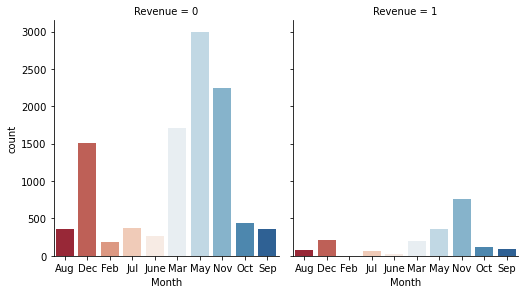

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


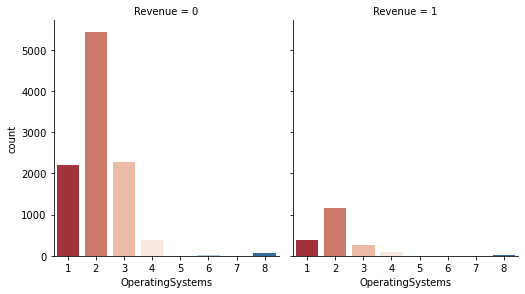

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


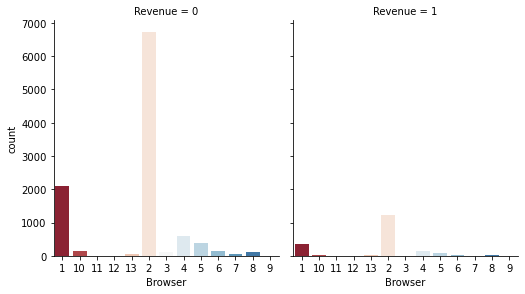

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


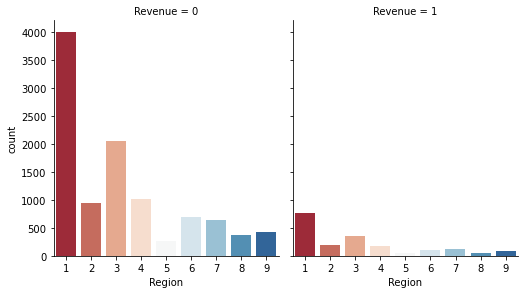

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


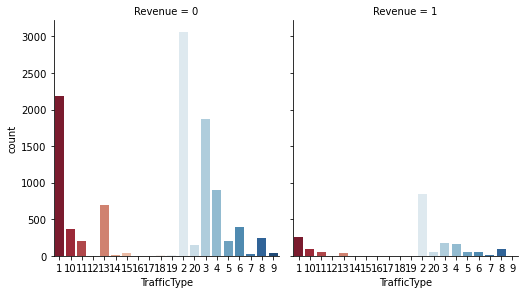

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


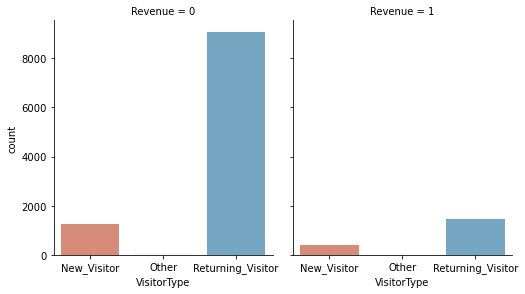

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


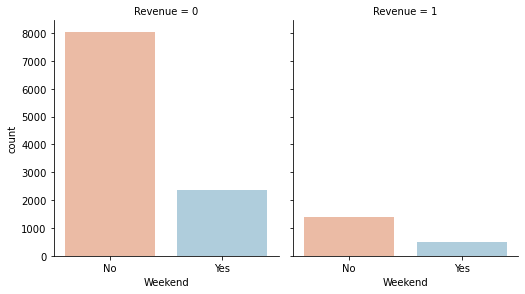

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


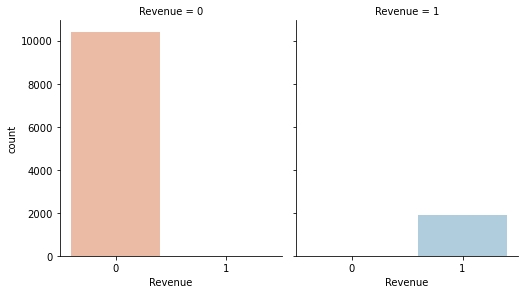

Occurance of Month in relation to target variable:

Month  Revenue
Aug    0           357
       1            76
Dec    0          1511
       1           216
Feb    0           181
       1             3
Jul    0           366
       1            66
June   0           259
       1            29
Mar    0          1715
       1           192
May    0          2999
       1           365
Nov    0          2238
       1           760
Oct    0           434
       1           115
Sep    0           362
       1            86
Name: Revenue, dtype: int64


Frequency distribution of Month concerning target variable:

Month  Revenue
Aug    0          82.448037
       1          17.551963
Dec    0          87.492762
       1          12.507238
Feb    0          98.369565
       1           1.630435
Jul    0          84.722222
       1          15.277778
June   0          89.930556
       1          10.069444
Mar    0          89.931830
       1          10.068170
May    0          89.149822
   

In [14]:
df_categorical_and_target = pd.concat([df_categorical.reset_index(drop=True),df_target.reset_index(drop=True)],axis=1)
for i in df_categorical_and_target:
    sns.catplot(i, col="Revenue",data=df_categorical_and_target, kind="count",height=4, aspect=.9,palette="RdBu");
    plt.show()
    
    
      
for i in df_categorical_and_target:
        print("Occurance of {} in relation to target variable:\n".format(i))
        print(df_categorical_and_target.groupby(i)["Revenue"].value_counts(), end="\n")
        print("\n")
        print("Frequency distribution of {} concerning target variable:\n".format(i))
        print(df_categorical_and_target.groupby(i)["Revenue"].value_counts(normalize=True) * 100)
        print("\n")
        print("Pesentage of {}'s atributues (response rate): \n".format(i))
        print((df_categorical_and_target[i].value_counts()/df_categorical_and_target[i].count())*100)
        print("\n")

Inference:

November, May, December and March have the most significant contribution to the positive class. February and June are the less visited months with the least contribution. Client needs to find what characteristics top months have and apply them in the rest of them. Operating systems 1,2,3,4,8 are the most used from the visitors with the highest contribution to the positive class. Operating systems 5,6,7 are showing minimum usage from the visitors with a minimum contribution. Browser 1,2 have the highest proportion for positive class while browser 7, 9, 11, 12, 13 has the minimum contribution. TrafficType have many attributes with a low contribution (7, 9, 14, 16, 19) on the positive and some with zero(12, 15, 17, 18) contribution. The client should examine the characteristics of the most used operating system(1,2) and browsers (1, 2) and find what the differences with the rest to assess the gaps and improve the positive class. 

A new visitor has a higher percentage of positive class, but most visitors are returning visitors marking the highest overall absolute contributor to the positive class. Weekend' percentage of the positive class is higher in, but there are more visitors during the week, and therefore a not significant difference in their rates can be identified. Thus, all attributes of the region, visitor type and Weekend significantly participate in positive class. Also, as new visitors have a higher contribution to purchases, the client should explore ways to attract more new visitors.

We will transform the attributes with no significant contribution to the positive to avoid noise and reduce the dimensionality of the dataset. 

## 1.3.1 Numerical predictors

In [15]:
df_numerical.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0


Checking data for negative values:

In [16]:
sum(n < 0 for n in df_numerical.values.flatten())

0

### 1.3.2 Univariate analysis

Explore the distribution of the numerical predictors. Explore the variance of each numerical predictor after normalizing them in order to be comparable. Explore the existence of outliers in each numerical predictor.

Distribution of all numerical predictors:


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


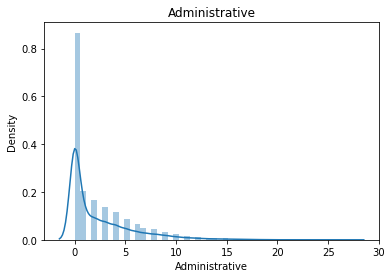

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


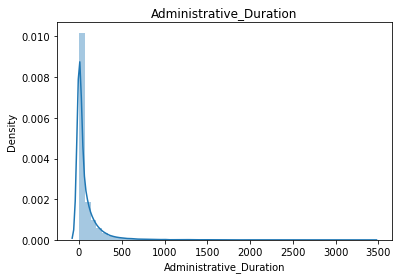

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


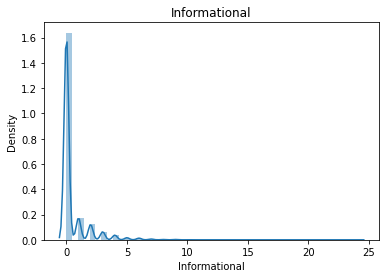

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


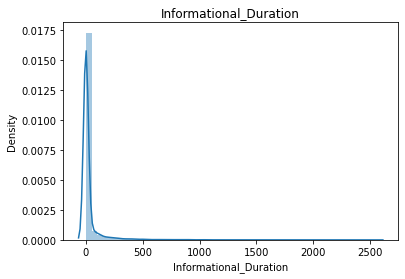

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


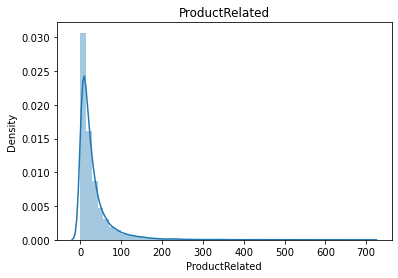

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


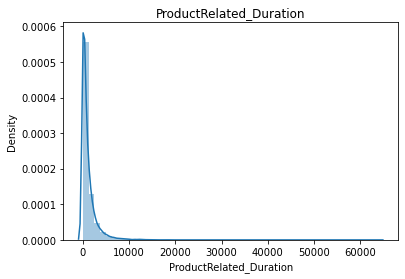

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


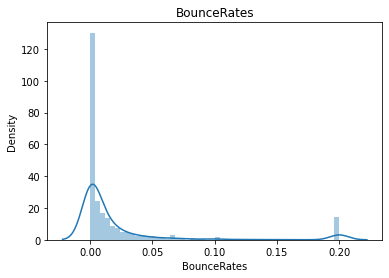

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


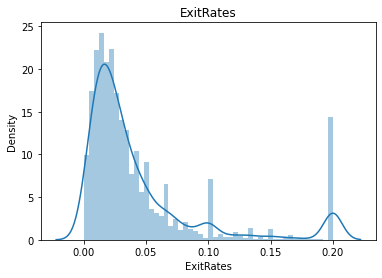

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


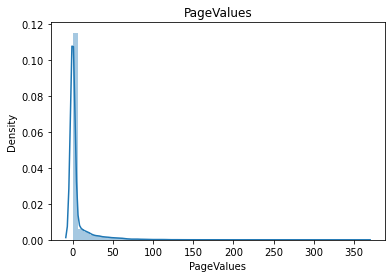

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


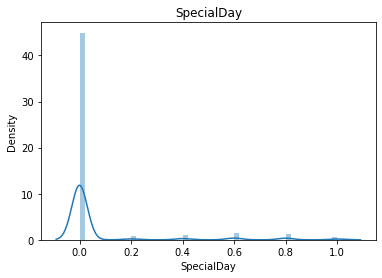

Normalize the data:


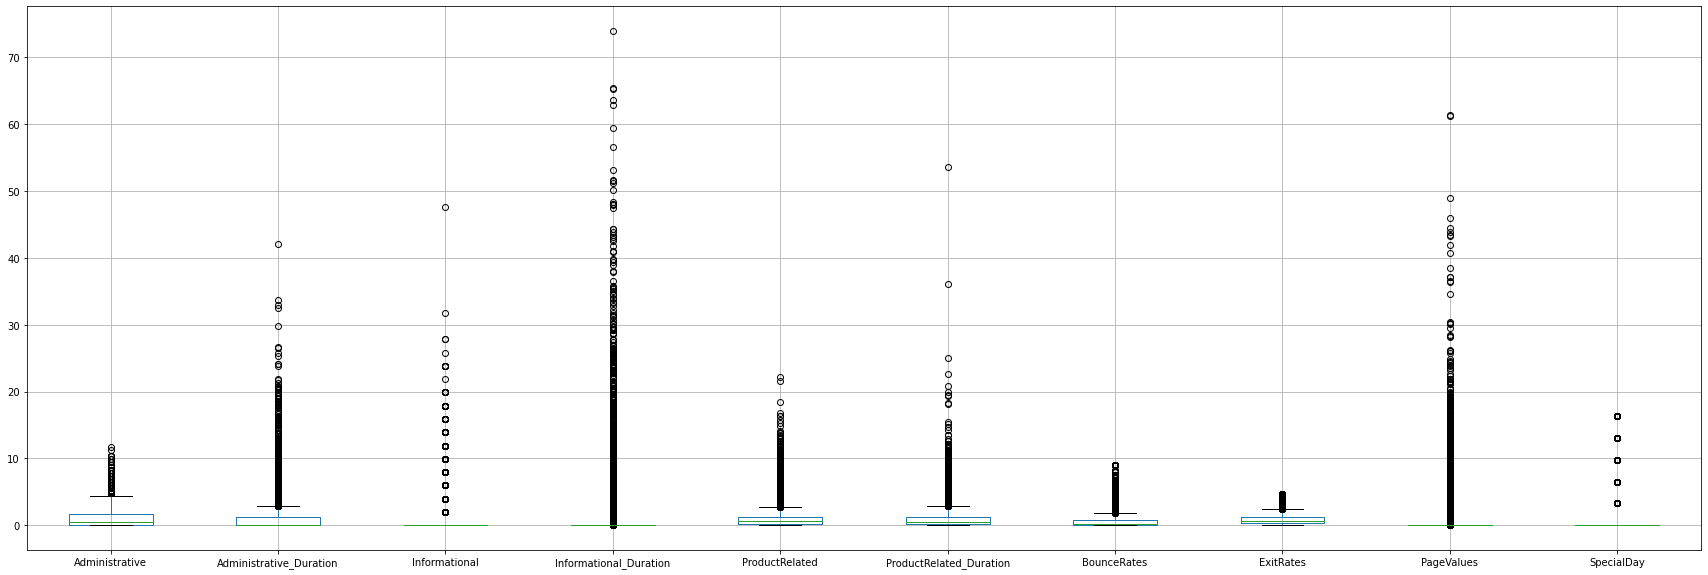

Variances of the normalized data:
Administrative              2.058631
Administrative_Duration     4.784528
Informational               6.362053
Informational_Duration     16.670532
ProductRelated              1.964542
ProductRelated_Duration     2.565562
BounceRates                 4.774256
ExitRates                   1.272930
PageValues                  9.940988
SpecialDay                 10.486258
dtype: float64

Outlier Analysis:


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


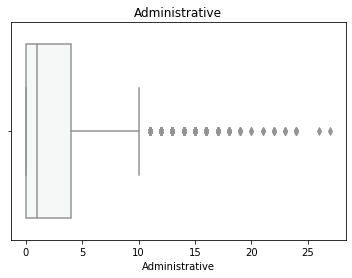

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


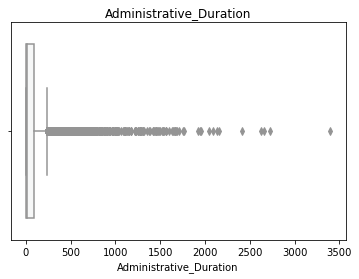

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


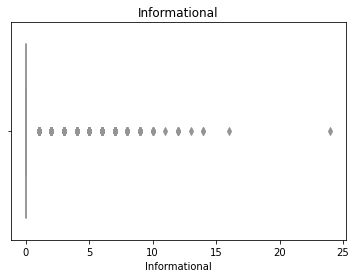

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


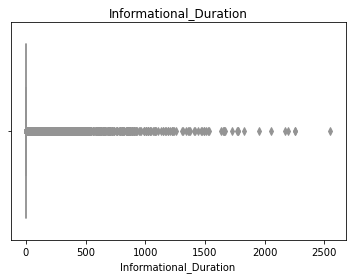

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


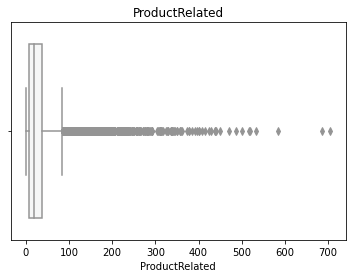

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


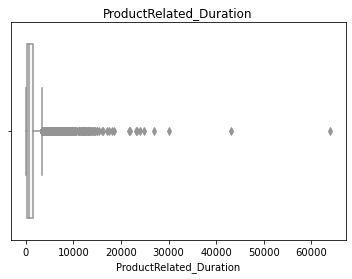

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


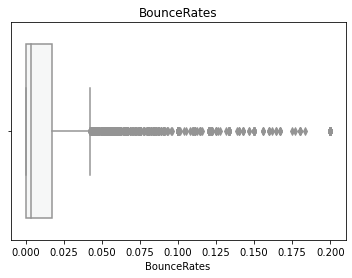

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


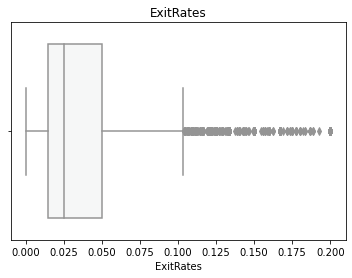

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


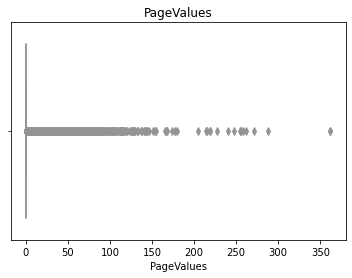

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


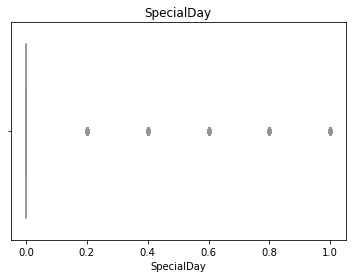

In [17]:
print("Distribution of all numerical predictors:")
for i in df_numerical:
    sns.distplot(df_numerical[i])
    plt.title(i)
    plt.show()
    
    
print("Normalize the data:") 
normalized_df = df_numerical / df_numerical.mean()
plt.figure(figsize=(30,10))
normalized_df.boxplot()
plt.show()

print("Variances of the normalized data:") 
print(normalized_df.var())
print("")  
    
print("Outlier Analysis:") 
for i in df_numerical:
    sns.boxplot(df_numerical[i],palette="RdBu")
    plt.title(i)
    plt.show()

Inference:

Many outliers exist in the data, but they describe the real visitors' behaviours. Therefore we will not remove them since they happen in real-time, but we will transform them properly. 

Numerical data have any different distributions, and we should scale and power transform them to the same range to be useful. Notice that informational_duration and page values do not have any distribution.

###  1.3.3 Bivariate analysis

Explore the correlation between the numerical predictors and target variable: 

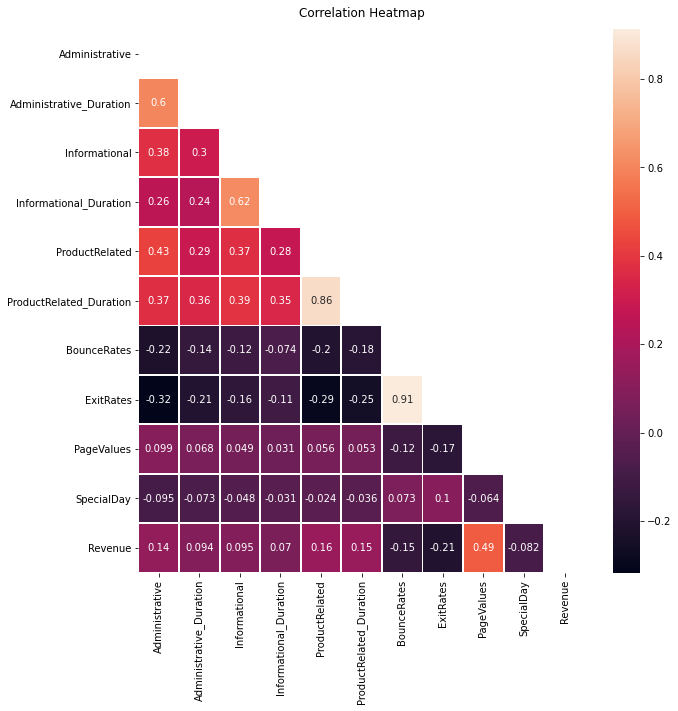

In [18]:
df_numerical_and_target=df.drop(columns=["Month","OperatingSystems","Browser","Region",
                                         "TrafficType","VisitorType","Weekend"])
plt.figure(figsize=(10,10))

#generate a mask for the upper triangle 
mask = np.triu(np.ones_like(df_numerical_and_target.corr(), dtype=bool))
heatmap = sns.heatmap(df_numerical_and_target.corr(),mask=mask,annot=True,fmt=".2g",linewidths=.9)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Inference:

Target variable has a high correlation with page values and negative with Bounces rates, ExitsRates. Also, there is a possibility that some independent numerical predictors to be codependent or collinear of each other, which could lead to overfitting and introduce bias to the model. Specifically, Administrative and Administrative_Duration, Infiormationl_Duration and Informational, ProductRelated_Duration and ProductRelated, ExitRate and BounceRate appear to have a high correlation between them. Thus, explore multicollinearity of all numerical predictors using the Variance Inflation Factor(VIF). If a number greater than 5, then the features are collinear of each other and assessed.

In [19]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Numerical predictors"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


VIF_df_numerical=df_numerical
calc_vif(VIF_df_numerical)

,Numerical predictors,VIF
0,Administrative,2.651491
1,Administrative_Duration,2.041915
2,Informational,2.113723
3,Informational_Duration,1.777154
4,ProductRelated,6.339345
5,ProductRelated_Duration,6.012012
6,BounceRates,5.557495
7,ExitRates,5.978858
8,PageValues,1.077806
9,SpecialDay,1.105706


Inference:

Multicollinearity exists in ProductRelated_Duration and ProductRelated, ExitRate and BounceRate and prevents the target variable from acknowledging the importance of each a feature.

Visualise numerical predictors in relation to the target variable:

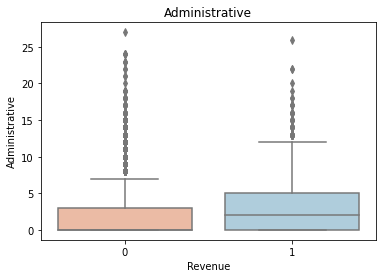

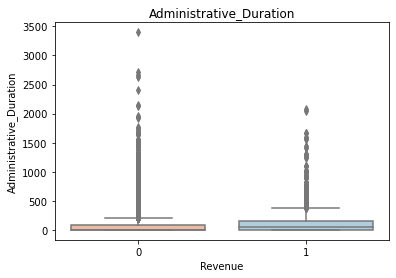

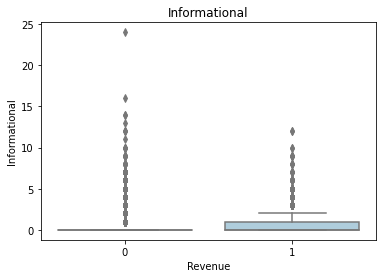

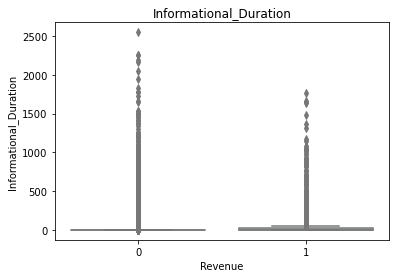

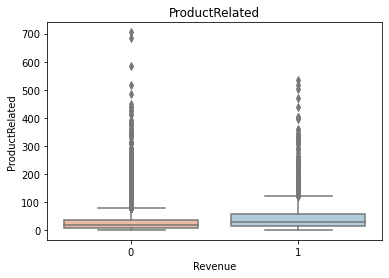

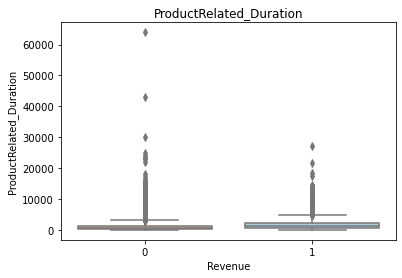

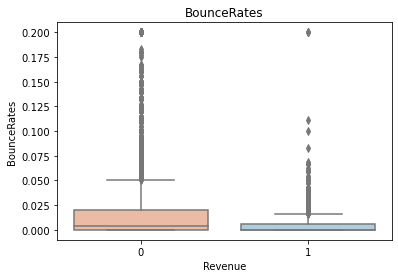

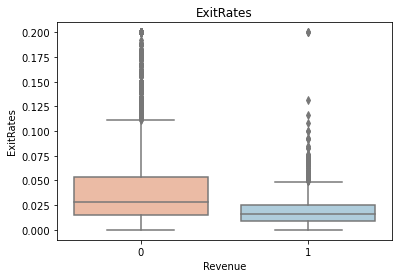

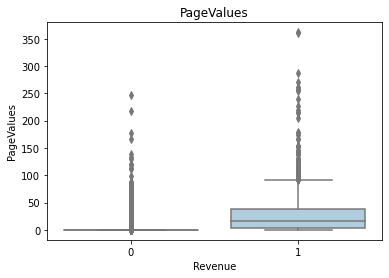

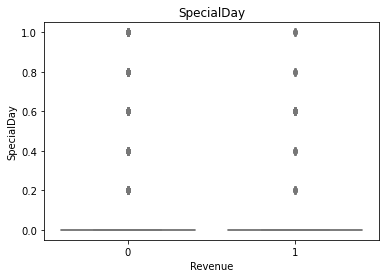

In [20]:
for i in df_numerical:
    sns.boxplot(x='Revenue',y=i,data=df_numerical, palette="RdBu")
    plt.title(i)
    plt.show()

Inference:

Page value visibly contributes more in positive class. ExiteRates and Bounce Rates for the positive class are lower than the negative class. Thus, the client should reduce the exit rates and bounce rates and improve the features of page value. 

Administrative ProductRelated and their durations have a higher contribution to the positive class. ProductRelated and its duration are the most important among the other tree pages and their duration as they are the most visited with higher contribution to the purchases. Therefore, the client should try to update the Administrative page in accordance with ProductRelated page characteristics. Informational, Informational_Duration and SpecialDay medians seem to be almost zero. 

### 1.3.4 Multivariate analysis

ProductRelated, ProductRelated_Duration, BounceRates and ExitRates are characterised by multicollinearity. Information about the same characteristics in different columns of Administrative and Administrative_Duration, Informational and Informational_Duration. These two subsets have almost 0,6 correlation between meaning that based on one column, we may predict the other for this dataset. Thus, visualisation could show us potential overlap between the columns in terms of their effect and whether some feature engineering could help avoid multicollinearity or redundant information. In line with the previous aim, we will compare groups of the rest of the numerical predictors with the target variable.

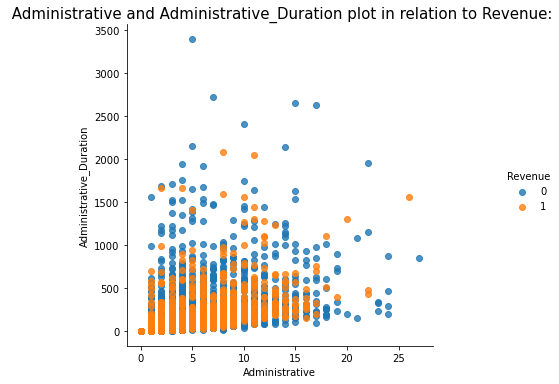

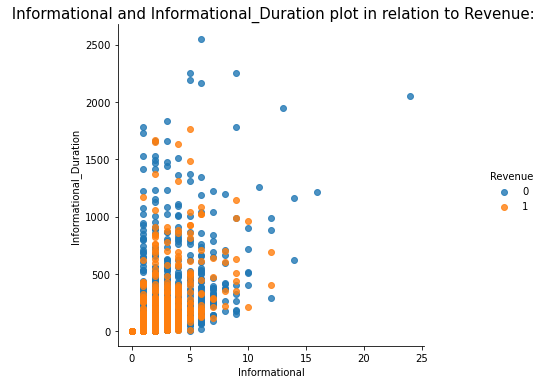

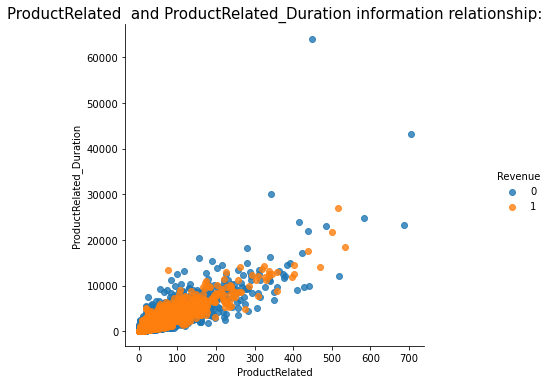

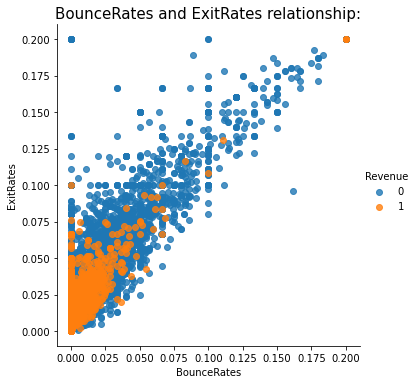

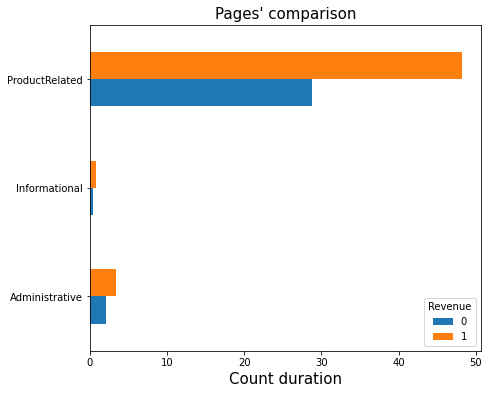

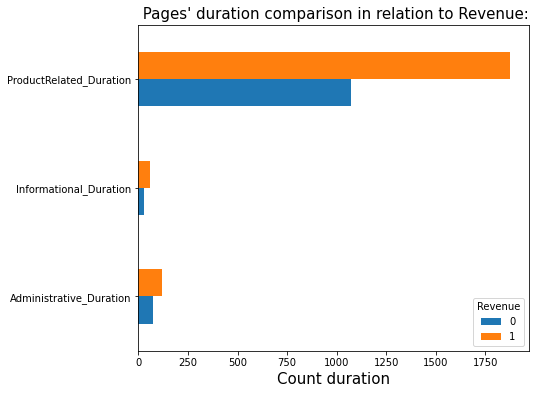

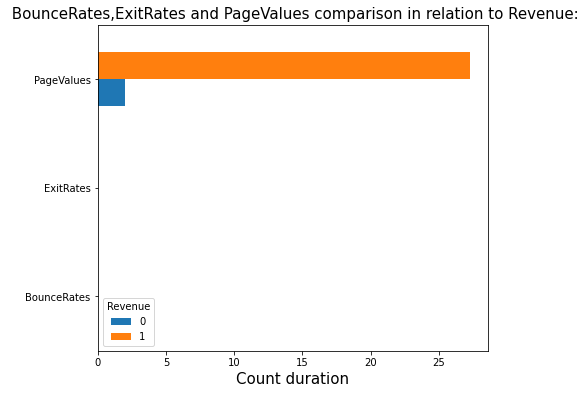

In [21]:
sns.lmplot(x="Administrative", y = "Administrative_Duration" , hue='Revenue', data=df_numerical, fit_reg=False)
plt.title(" Administrative and Administrative_Duration plot in relation to Revenue:",fontsize=15)


sns.lmplot(x="Informational", y = "Informational_Duration" , hue='Revenue', data=df_numerical, fit_reg=False)
plt.title(" Informational and Informational_Duration plot in relation to Revenue:",fontsize=15)


sns.lmplot(x="ProductRelated", y = "ProductRelated_Duration" , hue='Revenue', data=df_numerical, fit_reg=False)
plt.title("ProductRelated  and ProductRelated_Duration information relationship:",fontsize=15)


sns.lmplot(x="BounceRates", y = "ExitRates" , hue='Revenue', data=df_numerical, fit_reg=False)
plt.title("BounceRates and ExitRates relationship:",fontsize=15)


pd.pivot_table(df_numerical_and_target,values=['Administrative','Informational','ProductRelated'],
               index='Revenue').T.plot(kind='barh',figsize=(7,6))
plt.title("Pages' comparison",fontsize=15)
plt.xlabel('Count duration',fontsize=15)
plt.show()

pd.pivot_table(df_numerical_and_target,values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],
                   index='Revenue').T.plot(kind='barh',figsize=(7,6))
plt.title(" Pages' duration comparison in relation to Revenue:",fontsize=15)
plt.xlabel('Count duration',fontsize=15)
plt.show()

pd.pivot_table(df_numerical_and_target,values=["BounceRates","ExitRates","PageValues"],
               index='Revenue').T.plot(kind='barh',figsize=(7,6))
plt.title(' BounceRates,ExitRates and PageValues comparison in relation to Revenue:',fontsize=15)
plt.xlabel('Count duration',fontsize=15)
plt.show()

Inference:

Administrative and Administrative_Duration, Informational and Informational_Duration hold the same information as measurements of the same things, but they are uncorrelated. Therefore all of them are useful for explaining the target variable without producing overlapping of information. ProductRelated, ProductRelated_Duration, BounceRates and ExitRates will be assessed in the preprocessing section to encounter multicollinearity.

Assessing the information of the original dataset:

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# 2 Data Preprocessing

## 2.1 Feature Engineering

Through the exploratory analysis was found in categorical predictors that "Month", "OperatingSystems", "Browser" and "TrafficType" contain attributes which have a frequency less than 5% of the category' total observations. Therefore, a combination into the same group of those attributes wii be done, based on attributes frequency distribution and response rate, to improve the model's performance and reduce the noise. Those rare attributes will be stored in a new variable named "Other" for "'Month' and in the new variable named "33" for the other predictors.

In [23]:
df_categorical['Month']= df_categorical['Month'].replace(["Feb", "June"], "Other")                  

In [24]:
df_categorical['OperatingSystems']= df_categorical['OperatingSystems'].replace(["5","6","7"],"33")

In [25]:
df_categorical['Browser']= df_categorical['Browser'].replace(["7","9","11","12","13"],"33")

In [26]:
df_categorical['TrafficType']=df_categorical['TrafficType'].replace(["7","9","12","14","15","16","17","18","19"],"33")

Assessing the results of feature engineering:

In [27]:
#Explore all labels in each categorical variable   
for i in df_categorical:
    print(i)
    print(df_categorical[i].unique())
    print(type(df_categorical[i]))
    print("")
    

Month
['Other', 'Mar', 'May', 'Oct', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']
Categories (9, object): ['Other', 'Mar', 'May', 'Oct', ..., 'Aug', 'Nov', 'Sep', 'Dec']
<class 'pandas.core.series.Series'>

OperatingSystems
['1', '2', '4', '3', '33', '8']
Categories (6, object): ['1', '2', '4', '3', '33', '8']
<class 'pandas.core.series.Series'>

Browser
['1', '2', '3', '4', '5', '6', '33', '10', '8']
Categories (9, object): ['1', '2', '3', '4', ..., '6', '33', '10', '8']
<class 'pandas.core.series.Series'>

Region
['1', '9', '2', '3', '4', '5', '6', '7', '8']
Categories (9, object): ['1', '9', '2', '3', ..., '5', '6', '7', '8']
<class 'pandas.core.series.Series'>

TrafficType
['1', '2', '3', '4', '5', ..., '8', '10', '11', '13', '20']
Length: 12
Categories (12, object): ['1', '2', '3', '4', ..., '10', '11', '13', '20']
<class 'pandas.core.series.Series'>

VisitorType
['Returning_Visitor', 'New_Visitor', 'Other']
Categories (3, object): ['Returning_Visitor', 'New_Visitor', 'Other']
<class 'panda

## 2.2 Feature  Selection

Two columns that appear to have multicollinearity will be dropped from the numerical predictors to help bring down the multicollinearity and minimize model complexity by losing as less information as possible. Between ExitRate, BounceRate, ProductRelated_Duration and ProductRelated the features with the lower variances(product_raleted and exits_rates) of the normalized data will be chosen to be dropped as low variance features contain little useful information. VarianceThreshold() function will be used to remove features with variance lower than 2. Moreover, by dropping those predictors, we assess the assumption of independence among the predictors that most of the machine learning models have as strongly correlated features introduced bias into the model. The new form of numerical predictors will be stored in "df_numerical_reduced".

In [28]:
from sklearn.feature_selection import VarianceThreshold
# Create a VarianceThreshold feature selector 
sel = VarianceThreshold(threshold=2)

# Fit the selector to normalized df_numerical
sel.fit(df_numerical / df_numerical.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
df_numerical_reduced = df_numerical.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(df_numerical.shape[1], df_numerical_reduced.shape[1]))

Dimensionality reduced from 10 to 8.


Checking the impact of feature selection in numerical predictors:

In [29]:
df_numerical_reduced.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay
0,0,0.0,0,0.0,0.000000,0.20,0.0,0.0
1,0,0.0,0,0.0,64.000000,0.00,0.0,0.0
2,0,0.0,0,0.0,0.000000,0.20,0.0,0.0
3,0,0.0,0,0.0,2.666667,0.05,0.0,0.0
4,0,0.0,0,0.0,627.500000,0.02,0.0,0.0


Checking the impact of feature selection in Multicollinearity :

In [30]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


X=df_numerical_reduced
calc_vif(X)

,variables,VIF
0,Administrative,2.325482
1,Administrative_Duration,1.965009
2,Informational,2.094024
3,Informational_Duration,1.755086
4,ProductRelated_Duration,1.707504
5,BounceRates,1.040089
6,PageValues,1.073658
7,SpecialDay,1.050994


In [31]:
print(df_categorical.info())
print(df_numerical_reduced.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Month             12330 non-null  category
 1   OperatingSystems  12330 non-null  category
 2   Browser           12330 non-null  category
 3   Region            12330 non-null  category
 4   TrafficType       12330 non-null  category
 5   VisitorType       12330 non-null  category
 6   Weekend           12330 non-null  category
dtypes: category(7)
memory usage: 86.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330

After feature engineering and selection, a new dataset "df_new" will be created for storing the modified predictors:

In [32]:
df_new = pd.concat([df_numerical_reduced.reset_index(drop=True),
                    df_categorical.reset_index(drop=True),
                    df_target.reset_index(drop=True)],axis=1)

Checking the shape and information of the "df_new":

In [33]:
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,Other,1,1,1,1,Returning_Visitor,No,0
1,0,0.0,0,0.0,64.000000,0.00,0.0,0.0,Other,2,2,1,2,Returning_Visitor,No,0
2,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,Other,4,1,9,3,Returning_Visitor,No,0
3,0,0.0,0,0.0,2.666667,0.05,0.0,0.0,Other,3,2,2,4,Returning_Visitor,No,0
4,0,0.0,0,0.0,627.500000,0.02,0.0,0.0,Other,3,3,1,4,Returning_Visitor,Yes,0


In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated_Duration  12330 non-null  float64 
 5   BounceRates              12330 non-null  float64 
 6   PageValues               12330 non-null  float64 
 7   SpecialDay               12330 non-null  float64 
 8   Month                    12330 non-null  category
 9   OperatingSystems         12330 non-null  category
 10  Browser                  12330 non-null  category
 11  Region                   12330 non-null  category
 12  TrafficType              12330 non-null  category
 13  VisitorType              12330 non-null  category
 14  Weeken

In [35]:
df_new.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated_Duration    0
BounceRates                0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## 2.3  Splitting the data into training and test sets

The issues of overfitting and data leakage can be minimized by splitting the data. Training the model on the entire dataset will not allow us to test and validate it. Thus, the test set allows to preserve some unseen data and measure the models' performance on them. Test and train set should be representative samples of the dataset. As imbalance characterise the target variable, we use stratified sampling in the splitting because it takes into consideration the distribution of classes of the dataset. 

In [36]:
# Separate predictors and target variable
y = df_new["Revenue"]
X = df_new.drop("Revenue", axis=1)

#print(X)
#print(y)

In [37]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=y,shuffle=True)

# Ensure training dataset has 85% of original X data
print("Train dataset has {}% of the 'df_new' dataset. ".format((X_train.shape[0] / X.shape[0])*100))

# Ensure testing dataset has  15% of original X data
print("Test dataset has {}% of the 'df_new' dataset. ".format((X_test.shape[0] / X.shape[0])*100))

Train dataset has 84.99594484995944% of the 'df_new' dataset. 
Test dataset has 15.004055150040552% of the 'df_new' dataset. 


## 2.4 Feature scaling 

We need to give equal importance to every predictor, thus, scaling them because they do not have a normal distribution and do have a significant amount of outliers. We will use Power Transformer for the scaling which will make more normal the distributions and stabilizing the variance of the distribution as it is not sensitive to outliers. This step is necessary as many models assume that the are training data are normally distributed and impacts the model's ability to learn.

In [38]:
X_train_numeric=X_train.select_dtypes(include=["int64" ,"float64"])
X_test_numeric=X_test.select_dtypes(include=["int64" ,"float64"])
X_train_categoric=X_train.select_dtypes(include=["category"])
X_test_categoric=X_test.select_dtypes(include=["category"])


# Initialize StandardScaler instance
scaler = PowerTransformer(standardize=True)

# Fit and transform the scaler on numerical columns in DataFrame
X_train_scaler =pd.DataFrame(scaler.fit_transform(X_train_numeric),columns=X_train_numeric.columns)
X_test_scaler = pd.DataFrame(scaler.transform(X_test_numeric),columns=X_test_numeric.columns) 

X_train_scaler.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay
0,0.087176,0.459647,-0.521488,-0.491647,-0.635483,-0.797530,-0.530038,-0.336670
1,1.289162,1.102076,-0.521488,-0.491647,0.719225,-0.797530,-0.530038,-0.336670
2,-0.992505,-1.000029,-0.521488,-0.491647,-0.190202,-0.063262,-0.530038,2.981033
3,1.037596,1.019915,1.961576,2.079729,1.678191,-0.632049,-0.530038,-0.336670
4,0.087176,1.101715,-0.521488,-0.491647,0.236205,-0.797530,-0.530038,-0.336670


In [39]:
X_train_scaler.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated_Duration    0
BounceRates                0
PageValues                 0
SpecialDay                 0
dtype: int64

In [40]:
X_test_scaler.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay
0,-0.992505,-1.000029,-0.521488,-0.491647,-0.529689,-0.797530,-0.530038,-0.33667
1,1.037596,0.874590,1.819862,2.087126,-0.289265,-0.365398,-0.530038,-0.33667
2,1.377628,1.123744,1.819862,2.044067,1.812991,-0.350786,0.799822,-0.33667
3,1.377628,0.783709,-0.521488,-0.491647,0.078447,-0.356747,-0.530038,-0.33667
4,-0.992505,-1.000029,-0.521488,-0.491647,1.504751,0.425441,-0.530038,-0.33667


Checking impact of PowerTransformer on variance and outliers of the numeric predictors:

                              Var
Administrative           1.000095
Administrative_Duration  1.000095
Informational            1.000095
Informational_Duration   1.000095
ProductRelated_Duration  1.000095
BounceRates              1.000095
PageValues               1.000095
SpecialDay               1.000095


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


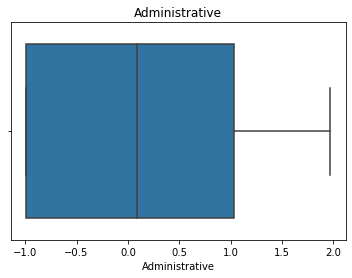

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


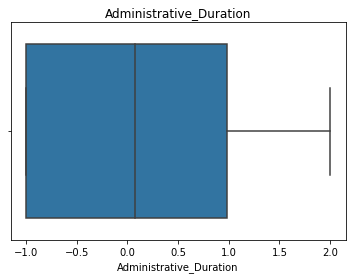

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


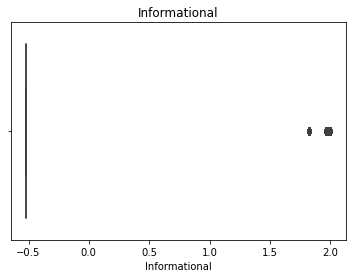

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


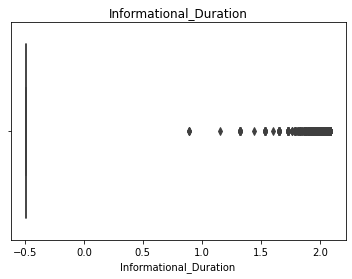

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


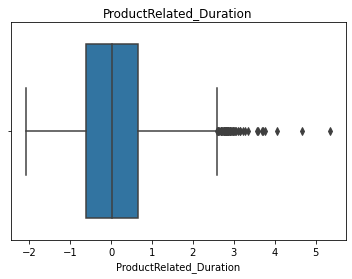

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


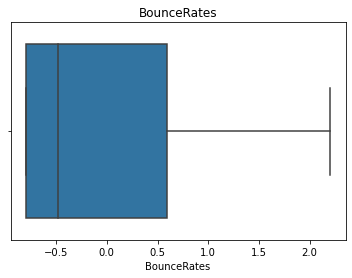

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


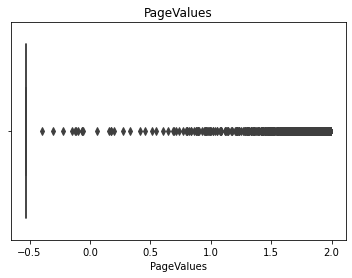

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


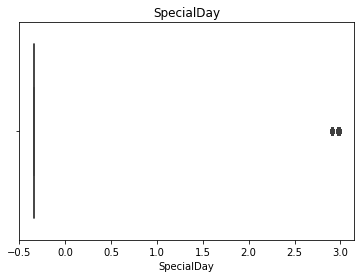

In [41]:
#Variance analysis
var_df=pd.DataFrame()
var_df["Var"]=X_train_scaler.var()
print(var_df)

#Outlier Analysis 
for i in X_train_scaler:
    sns.boxplot(X_train_scaler[i])
    plt.title(i)
    plt.show()

Inference:

After PowerTransformer outliers and the variance have been significantly reduced.

## 2.5  Features Encoding

Create a combined dataset for X_train, including the scaled numerical and categorical predictors. The same applies to the X_test.

Encoding the categorical predictors of training and test set to numbers before we fit and evaluate the models, as machine learning algorithms require all input and output variables to be numeric. The align command ensures the columns show up in the same order in both datasets (it uses column names to identify which columns line up in each dataset).

In [42]:
X_train = pd.concat([X_train_scaler.reset_index(drop=True),X_train_categoric.reset_index(drop=True)],axis=1)
X_test = pd.concat([X_test_scaler.reset_index(drop=True),X_test_categoric.reset_index(drop=True)],axis=1)

print(X_train.isna().sum())

#encoding with dummy variables
X_train= pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test,  drop_first=True)
X_train,X_test =  X_train.align(X_test, join="left", axis =1, fill_value=0)

X_train.head()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated_Duration    0
BounceRates                0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month_Dec,Month_Other,Month_Jul,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_33,OperatingSystems_8,Browser_10,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_33,Browser_8,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_10,TrafficType_11,TrafficType_13,TrafficType_2,TrafficType_20,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_33,TrafficType_8,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_Yes
0,0.087176,0.459647,-0.521488,-0.491647,-0.635483,-0.797530,-0.530038,-0.336670,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1.289162,1.102076,-0.521488,-0.491647,0.719225,-0.797530,-0.530038,-0.336670,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,-0.992505,-1.000029,-0.521488,-0.491647,-0.190202,-0.063262,-0.530038,2.981033,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1.037596,1.019915,1.961576,2.079729,1.678191,-0.632049,-0.530038,-0.336670,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0.087176,1.101715,-0.521488,-0.491647,0.236205,-0.797530,-0.530038,-0.336670,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [43]:
X_test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month_Dec,Month_Other,Month_Jul,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_33,OperatingSystems_8,Browser_10,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_33,Browser_8,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_10,TrafficType_11,TrafficType_13,TrafficType_2,TrafficType_20,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_33,TrafficType_8,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_Yes
0,-0.992505,-1.000029,-0.521488,-0.491647,-0.529689,-0.797530,-0.530038,-0.33667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,1.037596,0.874590,1.819862,2.087126,-0.289265,-0.365398,-0.530038,-0.33667,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1.377628,1.123744,1.819862,2.044067,1.812991,-0.350786,0.799822,-0.33667,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1.377628,0.783709,-0.521488,-0.491647,0.078447,-0.356747,-0.530038,-0.33667,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,-0.992505,-1.000029,-0.521488,-0.491647,1.504751,0.425441,-0.530038,-0.33667,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


Checking X_train'and X_test' after data transformation shape:

In [44]:
print(X_train.shape)
print(X_test.shape)

(10480, 51)
(1850, 51)


Checking if X_train'and X_test' after data transformation contains zero values :

In [45]:
X_train.isna().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated_Duration          0
BounceRates                      0
PageValues                       0
SpecialDay                       0
Month_Dec                        0
Month_Other                      0
Month_Jul                        0
Month_Mar                        0
Month_May                        0
Month_Nov                        0
Month_Oct                        0
Month_Sep                        0
OperatingSystems_2               0
OperatingSystems_3               0
OperatingSystems_4               0
OperatingSystems_33              0
OperatingSystems_8               0
Browser_10                       0
Browser_2                        0
Browser_3                        0
Browser_4                        0
Browser_5                        0
Browser_6                        0
Browser_33                       0
Browser_8           

In [46]:
X_test.isna().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated_Duration          0
BounceRates                      0
PageValues                       0
SpecialDay                       0
Month_Dec                        0
Month_Other                      0
Month_Jul                        0
Month_Mar                        0
Month_May                        0
Month_Nov                        0
Month_Oct                        0
Month_Sep                        0
OperatingSystems_2               0
OperatingSystems_3               0
OperatingSystems_4               0
OperatingSystems_33              0
OperatingSystems_8               0
Browser_10                       0
Browser_2                        0
Browser_3                        0
Browser_4                        0
Browser_5                        0
Browser_6                        0
Browser_33                       0
Browser_8           

## 2.6 Dimensionality reduction through Principal Component Analysis (PCA)

PCA will make the dataset simpler and less likely to overfit.
It uses a linear transformation to project features(linear or nonlinear) into space where they are completely uncorrelated. In each component, PCA captures as much of the variance in the dataset as possible while the feature space is reduced. A component does not contain duplicate information, and they are ranked from most to least important.
 
The explained variance ratio by component shows the percentage of variance explained by that component. 
The components_ attribute shows to what extent each component's vector is affected by a particular feature. 

To find the components expressing most of the data variance, we plot the explained variance ratio of a fitted PCA instance. Most of the explained variance is concentrated in the first ten components. After that point, the explained variance ratio per component starts to level out. This shift called 'elbow' in the plot is the best-practised starting point for the number of components to keep. 

components
 [[ 4.48721818e-01  4.43093299e-01  3.95125669e-01 ... -1.73327588e-03
  -1.05022745e-02  1.35877332e-02]
 [-2.59467093e-01 -2.75813706e-01  5.44992241e-01 ... -1.70448028e-03
   6.61374183e-02 -6.66654212e-03]
 [ 2.08061223e-01  2.05040723e-01 -1.59113138e-01 ... -3.90386058e-03
   3.24319964e-02 -3.69109190e-02]
 ...
 [ 4.16077926e-04 -1.00073902e-03  3.08817362e-03 ... -3.93729745e-01
  -1.54880640e-02  1.04141238e-03]
 [ 4.51440648e-04 -1.53155328e-03  1.45484623e-03 ... -6.14546551e-01
  -1.17322293e-02 -1.91057163e-03]
 [ 1.81667464e-03 -7.63419184e-04 -2.24749922e-03 ... -1.85671182e-01
  -3.58064268e-03 -1.52995068e-03]]
Cumulative Variance Explained
 [0.29871554 0.42404358 0.51878533 0.60317033 0.67387623 0.72508209
 0.75353191 0.77844271 0.80051903 0.81803807 0.83393537 0.84895564
 0.86373369 0.87642055 0.88747803 0.89675181 0.90520915 0.91242151
 0.91902671 0.9254328  0.93124034 0.93671412 0.9415318  0.94610517
 0.95025252 0.95430319 0.95829039 0.96202174 0.965530

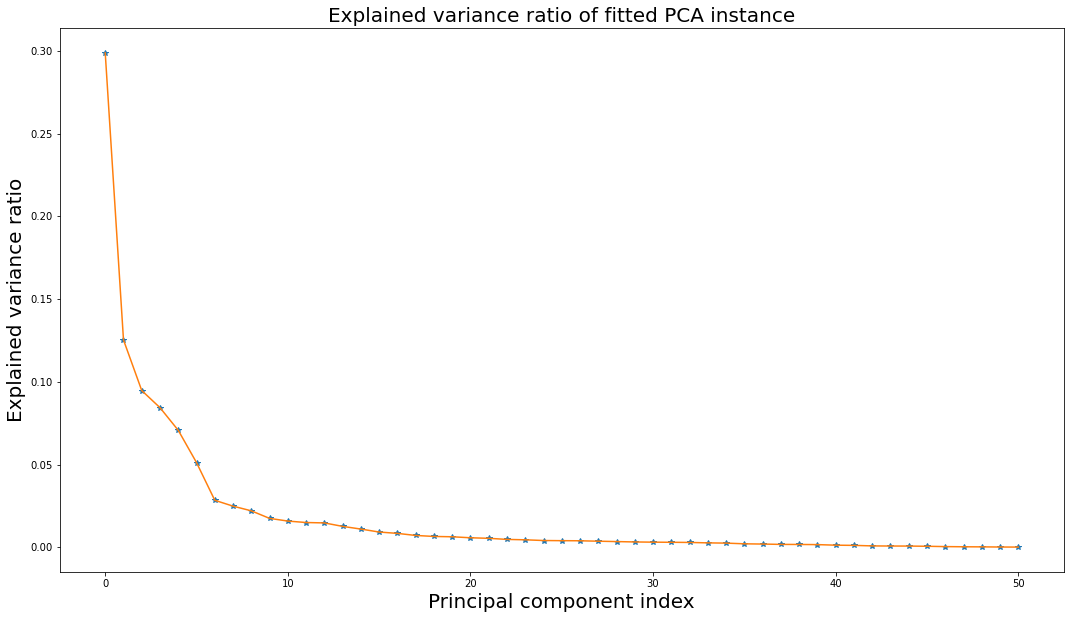

In [47]:
from sklearn.decomposition import PCA

#selecting 90% of the data variance.
pca = PCA()
fit_pca= pca.fit(X_train)
#access values and vectors
print("components\n", fit_pca.components_)
var=fit_pca.explained_variance_ratio_
cumvar=fit_pca.explained_variance_ratio_.cumsum()
print( "Cumulative Variance Explained\n",cumvar)

#To how many components can you reduce the dataset without compromising 
#too much on explained variance? Note that the x-axis is zero indexed.
plt.figure(figsize=(18 , 10))
plt.plot(var,"*")
plt.plot(var)
plt.title('Explained variance ratio of fitted PCA instance',fontsize=20)
plt.xlabel("Principal component index",fontsize=20)
plt.ylabel("Explained variance ratio",fontsize=20)
plt.show()

Inference:

The 'elbow' in the plot is at nine components to select more than ten components. A way to select components through PCA  is by expressing the minimal proportion of variance we want to keep and deciding on the number of components it needs to achieve that. The explained variance ratio of each principal component shows that the first 17 components explain 90% of the data's variance and the rest of the remaining 10%. The remaining components explain so little variance, and they can be dropped. Therefore we will build a model that explains 90% of the variance and satisfy the "elbow" information.

The transformed with PCA X_train and X_test will be stored at new variables named  X_train_pca and X_test_pca respectively for further analysis.

In [48]:
#Building Model Using PCA components that explain 91% variance of the data
pca = PCA(n_components=0.91)
#transform data
X_train_pca = pca.fit_transform(X_train)
X_test_pca =pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(10480, 18)
(1850, 18)


# 3 Model Creation 

**Classifiers

Logistic regression
Logistic regression is a learning technique most commonly used or binary classification. It is simple, easy to implement and performs well in many tasks. It has to be adjusted to consider skewed distributions by the class_weight argument used to influence(weight model error by class weight) the number of coefficients when fitting them. This version is called cost-sensitive or weighted logistic regression and makes it a useful model for our imbalanced dataset.

The class_weight argument is adjusted based on the importance of each class. It penalizes mistakes of class with a value equal to class_weight. So the higher value put more emphasis on this class. We will use the heuristic way by applying to the class_weight the general best practice to use the inverse of the classes distributions, which is presented in the training dataset. The training dataset's class distribution is a 1:5.45 ratio for the minority(1) class to the majority(0) class. The inversion of this ratio is used to define theclass_weight. Class_weight is hyperparameter and will be tuning in the Tuning and cross-validation.

Radom forest 
Random forests is a robust option, as it builds a slew of decision trees when training the model. It can handle complex data without being susceptible to overfitting. As logistic regression, it has been modified to precisely same way and numbers, to work well on highly imbalanced data. This version of the random forest is named Weighted Random Forest.
 
Extreme Gradient Boosting(XGBoost)
XGBoost is an ensemble of decision trees algorithm and an implementation of the stochastic gradient boosting model. The general criteria for using it is that the number of features in the training set has to be smaller than the number of examples. XGBoost to do well with mixture datasets of categoric and numeric features. Although it is effective on skewed class, it has a  modified version of the Weighted XGBoost or Cost-Sensitive XGBoost to pay more attention to the minority class's misclassification. The scale_pos_weight argument weights the error proportional to the positive class during training. Its value will be set based on the heuristic way, and it is 5.45 the inverse of the class distribution.


**Model performance metrics:

We will predict class labels of whether a customer is making a purchase or not. Accuracy is misleading for this imbalanced dataset as high accuracy (or low error) is achievable by most models(have no skill) which are focusing on predicting the majority class(accuracy paradox). The main objective is to reduce the false negatives as misclassification errors on the minority class are more important than other prediction errors. Therefore misclassification of actual purchases as not purchases results in a greater cost for the company than misclassification of no purchases as purchases. Thus, performance metrics that focus on the minority class should be selected to evaluate the model performance.

Chosen performance metrics should be minimizing the misclassification errors in general, and favours minimizing the misclassification error of minority class. Precision measures the percentage of correctly labelled purchases for the predicted positive class. Maximizing precision means that our classifier had low false-positive errors of no purchases predicted as purchases, and it is used when we do not want to overpredict positive values. Recall measures the number of actual total purchases that were correctly labelled, and it is about how well the positive class was predicted. Maximizing recall will minimize the false-negative errors of real misclassified purchases and is used when we can not afford to miss any positive values. 

Precision and recall are inversely related metrics, and we want to focus on maximizing both of them. Thus, the F-Measure and specifically F1-score, which is the harmonic mean of precision and recall, will be our mean score metric and used to compare the models on this binary classification problem. F1 summarizes a model’ ability to minimize misclassification errors for the positive class.

The false negatives are more costly than false positives therefore recall will also be used for assessing the models' performance.
False Negative: Purchase (class 1) predicted as no purchase (class 0).
False Positive: no purchase (class 0) predicted as a purchase (class 1).

The precision-recall curve metric considers true negatives. The area under its curve can be used to compare classifiers as the focus on the minority class makes the Precision-Recall AUC more useful for imbalanced classification problems. Therefore Precision-Recall AUC will also be used for the performance evaluation of the models.

Structure:

Tree different models will be built and compared after fitting the chosen classifiers without tuning to identify the optimal structure for this imbalance dataset. Then the best-fitted stature will be chosen to continue with further analysis.

Model-1 will contain the most basic form of taking the original dataset by applying StandardScaler to the numerical predictors and dummies encoding to categoricals predictors. X_train_no_trf, X_test_no_trf, y_train_no_trf, y_test_no_trf will be the variables for splitting and store the train and test sets. Model-2 will contain the data transformation of the preprocessing session without PCA. Model-3 will contain the data transformation of the preprocessing session and PCA.

## 3.1. Model-1 without data transformation

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot


df["Month"] = df["Month"].astype(str).astype("category")
df["OperatingSystems"] = df["OperatingSystems"].astype(str).astype("category")
df["Browser"] = df["Browser"].astype(str).astype("category")
df["Region"] = df["Region"].astype(str).astype("category")
df["TrafficType"] = df["TrafficType"].astype(str).astype("category")
df["VisitorType"] = df["VisitorType"].astype(str).astype("category")
df["Weekend"] = df["Weekend"].astype(str).astype("category")
        


print(df.info())
print(" ")

# Separate input features and target variable
y_no_trf = df["Revenue"]
X_no_trf = df.drop("Revenue", axis=1)

# setting up testing and training sets
X_train_no_trf, X_test_no_trf, y_train_no_trf, y_test_no_trf = train_test_split(X_no_trf, y_no_trf,
                                test_size=0.15, random_state=42,stratify=y,shuffle=True)

print('X_train with no transformation:',X_train_no_trf.shape)
print('y_train with no transformation:',y_train_no_trf.shape)
print('X_test with no transformation:',X_test_no_trf.shape)
print('y_test with no transformation:',y_test_no_trf.shape)

X_train_numeric_no_trf=X_train_no_trf.select_dtypes(include=["int64" ,"float64"])
X_test_numeric_no_trf=X_test_no_trf.select_dtypes(include=["int64" ,"float64"])
X_train_categoric_no_trf=X_train_no_trf.select_dtypes(include=["category"])
X_test_categoric_no_trf=X_test_no_trf.select_dtypes(include=["category"])


#Initialize StandardScaler instance
scaler = StandardScaler()

#Fit and transform the scaler on numerical columns in DataFrame
X_train_scaler_no_trf =pd.DataFrame(scaler.fit_transform(X_train_numeric_no_trf),
                                    columns=X_train_numeric_no_trf.columns)
X_test_scaler_no_trf = pd.DataFrame(scaler.transform(X_test_numeric_no_trf),columns=X_test_numeric_no_trf.columns) 


#Create a combaind dataset for X_train with the scaled numerical and categorical predictors. The same applyes for the X_test. 
X_train_no_trf = pd.concat([X_train_scaler_no_trf.reset_index(drop=True),
                            X_train_categoric_no_trf.reset_index(drop=True)],axis=1)
X_test_no_trf = pd.concat([X_test_scaler_no_trf.reset_index(drop=True),
                           X_test_categoric_no_trf.reset_index(drop=True)],axis=1)

print(" ")
print("Checking for missing values:\n",X_train_no_trf.isna().sum())
print("Checking for missing values:\n",X_test_no_trf.isna().sum())

#One hot encoding / dummy variables
X_train_no_trf= pd.get_dummies(X_train_no_trf, drop_first=True)
X_test_no_trf = pd.get_dummies(X_test_no_trf,  drop_first=True)
X_train_no_trf,X_test_no_trf =  X_train_no_trf.align(X_test_no_trf, join="left", axis =1, fill_value=0)

print(" ")
print("X train shape with no trasformation:",X_train_no_trf.shape)
X_train_no_trf.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_10,Browser_11,Browser_12,Browser_13,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_2,TrafficType_20,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_Yes
0,-0.396829,-0.332051,-0.394739,-0.244111,-0.609611,-0.532032,-0.458440,-0.202827,-0.32091,-0.309788,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1.108662,0.303437,-0.394739,-0.244111,0.193335,0.210823,-0.458440,-0.460388,-0.32091,-0.309788,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,-0.697927,-0.455066,-0.394739,-0.244111,-0.127843,-0.406084,-0.300556,-0.125005,-0.32091,3.685996,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0.506465,0.136247,1.174932,0.825974,2.235112,1.803472,-0.426619,-0.555280,-0.32091,-0.309788,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,-0.396829,0.302598,-0.394739,-0.244111,0.422748,-0.192359,-0.458440,-0.805664,-0.32091,-0.309788,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [50]:
print("X test shape with no trasformation:",X_test_no_trf.shape)
X_test_no_trf.head()

X test shape with no trasformation: (1850, 68)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_10,Browser_11,Browser_12,Browser_13,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_2,TrafficType_20,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_Yes
0,-0.697927,-0.455066,-0.394739,-0.244111,-0.586669,-0.509094,-0.458440,-0.658303,-0.320910,-0.309788,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,0.506465,-0.069245,0.390096,3.523992,0.239218,-0.441335,-0.371100,-0.493557,-0.320910,-0.309788,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1.409760,0.355718,0.390096,0.019025,2.258053,2.142654,-0.367889,-0.639883,-0.283921,-0.309788,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1.409760,-0.157313,-0.394739,-0.244111,0.239218,-0.284444,-0.369202,-0.752369,-0.320910,-0.309788,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,-0.697927,-0.455066,-0.394739,-0.244111,0.766868,1.415056,-0.163006,-0.477887,-0.320910,-0.309788,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1


A function named model_metrics will be built to summaries and present the chosen metrics:

In [51]:
# Function for model metrics
def model_metrics(name,algo, X_train,y_train,X_test,y_test):
    model = algo
    # Fit the model on training data
    model.fit(X_train, y_train)
    # Predict  values on test data
    y_predicted = model.predict(X_test)
    # Predict probabilities
    probs = model.predict_proba(X_test)[:,1]
    print("")
    print(name.upper())
    print('Train Score: {} %'.format(round(model.score(X_train, y_train)*100)))
    # Calculate accuracy score on testing data
    print('Test Score: {} %'.format(round(accuracy_score(y_test, y_predicted)*100)))
    #Generate the classification report
    print("classification_report\n",classification_report(y_test, y_predicted))
    precision, recall, _ = precision_recall_curve(y_test, probs) 
    print('PR AUC Score :',round(auc(recall, precision)*100))
    
    
    #Generate the confusion matrix
    print('{} Confusion matrix :'.format(name))
    cnf_matrix=(confusion_matrix(y_test,y_predicted))
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = [value for value in cnf_matrix.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cnf_matrix, annot=labels,fmt='',cbar=False)
    plt.title('Confusion matrix')
    plt.ylabel('True label')
    plt.xlabel("Predicted label")
    plt.show()
    
    #Generate precision-recall curve
    print('precision-recall curve: ')
    # plot the model precision-recall curve
    pyplot.plot(recall, precision, marker='.', label= name)
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(y[y==1]) / len(y)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    print('Printing the parameters of the models: {}'.format(model.get_params()))


LOGISTIC_REGRESSION
Train Score: 85 %
Test Score: 84 %
classification_report
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      1564
           1       0.50      0.76      0.60       286

    accuracy                           0.84      1850
   macro avg       0.72      0.81      0.75      1850
weighted avg       0.88      0.84      0.86      1850

PR AUC Score : 65
Logistic_Regression Confusion matrix :


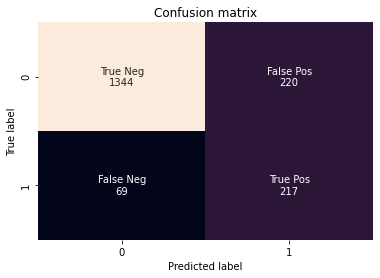

precision-recall curve: 


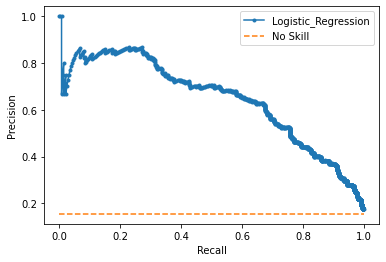

Printing the parameters of the models: {'C': 1.0, 'class_weight': {0: 1, 1: 5.45}, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

RANDOM_FOREST
Train Score: 100 %
Test Score: 89 %
classification_report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1564
           1       0.75      0.48      0.59       286

    accuracy                           0.89      1850
   macro avg       0.83      0.73      0.76      1850
weighted avg       0.89      0.89      0.88      1850

PR AUC Score : 72
Random_Forest Confusion matrix :


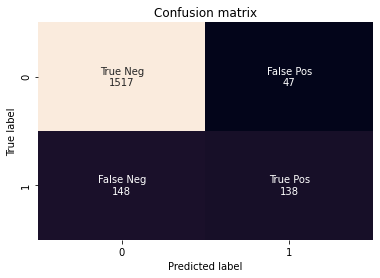

precision-recall curve: 


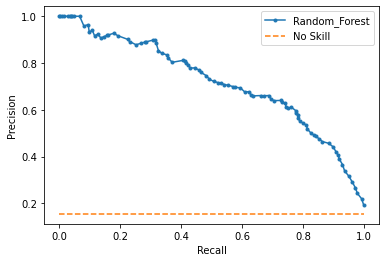

Printing the parameters of the models: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 5.45}, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}

XGBOOST
Train Score: 97 %
Test Score: 88 %
classification_report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1564
           1       0.60      0.71      0.65       286

    accuracy                           0.88      1850
   macro avg       0.77      0.81      0.79      1850
weighted avg       0.89      0.88      0.89      1850

PR AUC Score : 71
XGBoost Confusion matrix :


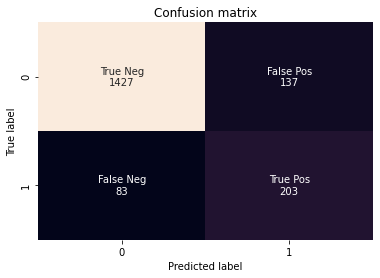

precision-recall curve: 


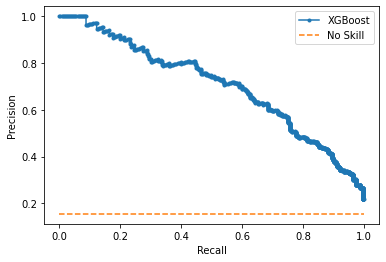

Printing the parameters of the models: {'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 5.455, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [52]:
models_no_trf = {
        'Logistic_Regression':LogisticRegression(solver="liblinear",class_weight={0:1, 1:5.45},random_state=2),
        'Random_Forest':RandomForestClassifier(class_weight={0:1, 1:5.45}, random_state=2),
        'XGBoost':xgb.XGBClassifier(scale_pos_weight=5.455,random_state=2)}


for name,algo in models_no_trf.items():
    model_metrics(name,algo,X_train_no_trf,y_train_no_trf,X_test_no_trf,y_test_no_trf)

## 3.2. Model-2 with data transformation


LOGISTIC_REGRESSION
Train Score: 86 %
Test Score: 86 %
classification_report
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      1564
           1       0.53      0.83      0.65       286

    accuracy                           0.86      1850
   macro avg       0.75      0.85      0.78      1850
weighted avg       0.90      0.86      0.87      1850

PR AUC Score : 66
Logistic_Regression Confusion matrix :


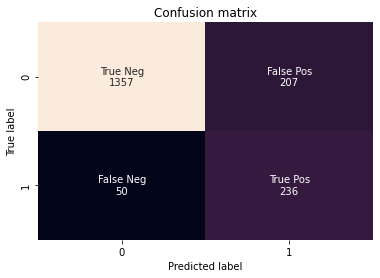

precision-recall curve: 


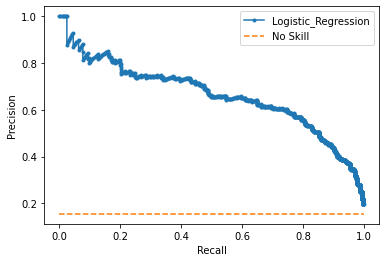

Printing the parameters of the models: {'C': 1.0, 'class_weight': {0: 1, 1: 5.45}, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

RANDOM_FOREST
Train Score: 100 %
Test Score: 89 %
classification_report
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1564
           1       0.72      0.50      0.59       286

    accuracy                           0.89      1850
   macro avg       0.82      0.73      0.76      1850
weighted avg       0.88      0.89      0.88      1850

PR AUC Score : 70
Random_Forest Confusion matrix :


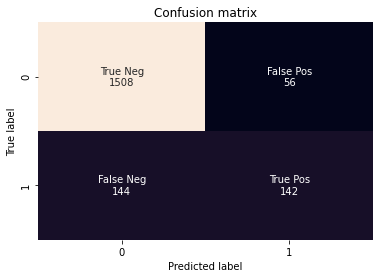

precision-recall curve: 


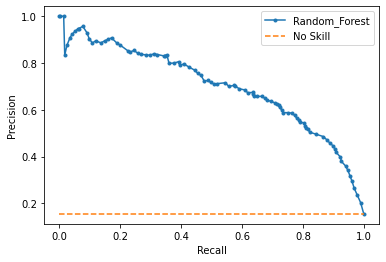

Printing the parameters of the models: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 5.45}, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}

XGBOOST
Train Score: 97 %
Test Score: 89 %
classification_report
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      1564
           1       0.62      0.73      0.67       286

    accuracy                           0.89      1850
   macro avg       0.78      0.83      0.80      1850
weighted avg       0.90      0.89      0.89      1850

PR AUC Score : 72
XGBoost Confusion matrix :


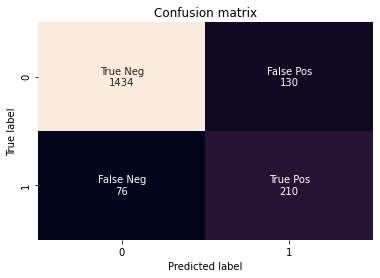

precision-recall curve: 


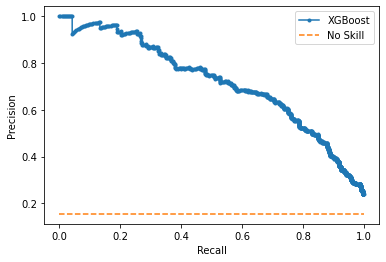

Printing the parameters of the models: {'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 5.455, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [53]:
models = {'Logistic_Regression':LogisticRegression(solver="liblinear",class_weight={0:1, 1:5.45},random_state=2),
        'Random_Forest':RandomForestClassifier(class_weight={0:1, 1:5.45}, random_state=2),
        'XGBoost':xgb.XGBClassifier(scale_pos_weight=5.455,random_state=2)}


for name,algo in models.items():
    model_metrics(name,algo,X_train,y_train,X_test,y_test)

## 3.3. Model-3 with data transformation and PCA


LOGISTIC_REGRESSION
Train Score: 86 %
Test Score: 86 %
classification_report
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      1564
           1       0.52      0.81      0.64       286

    accuracy                           0.86      1850
   macro avg       0.74      0.84      0.77      1850
weighted avg       0.89      0.86      0.87      1850

PR AUC Score : 66
Logistic_Regression Confusion matrix :


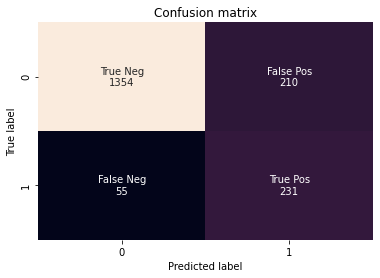

precision-recall curve: 


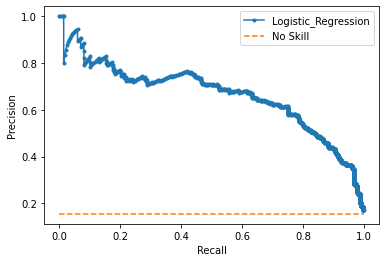

Printing the parameters of the models: {'C': 1.0, 'class_weight': {0: 1, 1: 5.45}, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

RANDOM_FOREST
Train Score: 100 %
Test Score: 89 %
classification_report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1564
           1       0.72      0.47      0.56       286

    accuracy                           0.89      1850
   macro avg       0.81      0.72      0.75      1850
weighted avg       0.88      0.89      0.88      1850

PR AUC Score : 69
Random_Forest Confusion matrix :


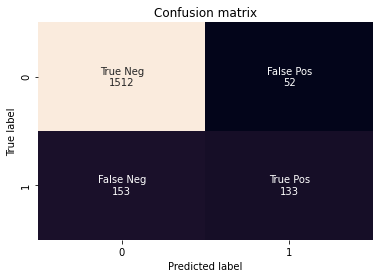

precision-recall curve: 


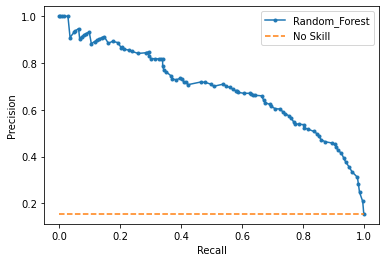

Printing the parameters of the models: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 5.45}, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}

XGBOOST
Train Score: 98 %
Test Score: 89 %
classification_report
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1564
           1       0.62      0.70      0.65       286

    accuracy                           0.89      1850
   macro avg       0.78      0.81      0.79      1850
weighted avg       0.89      0.89      0.89      1850

PR AUC Score : 69
XGBoost Confusion matrix :


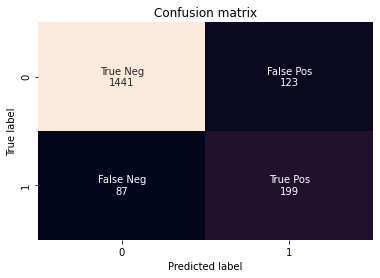

precision-recall curve: 


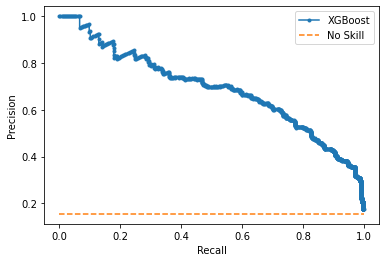

Printing the parameters of the models: {'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 5.455, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [54]:
# Initialize model and model' instance with data transformation and pca
models = {'Logistic_Regression':LogisticRegression(solver="liblinear",class_weight={0:1, 1:5.45}, random_state=2),
        'Random_Forest':RandomForestClassifier(class_weight={0:1, 1:5.45}, random_state=2),
        'XGBoost':xgb.XGBClassifier(scale_pos_weight=5.455,random_state=2)}


for name,algo in models.items():
    model_metrics(name,algo,X_train_pca,y_train,X_test_pca,y_test)

Inference:

As shown above, the best performance for all the classifiers is succeeded by the second model. The f1 and the Precision-Recall AUC scores developed the highest values in Model-2 for Logistic Regression and Xgboost classifiers. Random Forest presented the same f1 score in Model-1 and Model-2. Then, Recall and Precision-Recall AUC scores were compered, having scanted differences. Therefore Model-2 outline the best overall performance for all algorithms and is chosen as the best fitted for this dataset.  

# 3.4 Model-2:

## 3.4.1 Tuning and cross-validation 

We will combine model validation with tuning to create a more accurate, validated model and estimate the selected algorithms' performance in unseen data(hold-out set) given the chosen scoring metric of f1. The way that dataset is split up affects the chosen metric's outcome on the hold-out set(test set). As the test set may have some peculiarities, the f1 metric may not represent the model's ability to generalize to unseen data. To combat this dependence, we use the robust method of 10-fold cross-validation. It estimates the hold-out set's expected performance and reports the average of hold-out set performance across all data splits. GridSearchCV is used to find the best hyperparameters. It applies the attributes best params and score, to return the best-fitted hyperparameters and the mean cross-validation score over that fold. It can be computationally expensive but is guaranteed to find the best score in the sample space. After tuning the hyperparameters using cross-validation on the train test, we will evaluate the tuned models on the test set to report how well our model can be expected to perform on the unseen dataset.



**Logistic regression: hyperparameters tuned.

The main hyperparameters affecting the Weighted Logistic Regression is a penalty (controlling the regularization of the classifier), C (the inverse of the regularization strength), solver (algorithm to use for optimization) and the class_weight.

**Radom forest: hyperparameters tuned.

For Weighted Random Forest model, some parameters that affect performance are:max depth (maximum depth of the tree),  max features(number of features available), n_estimators (number of trees in the forest), criterion (measures the quality of a split), min_samples_split (minimum number of samples required to split an internal node), min_samples_leaf (minimum number of samples required to be at a leaf node)  and  class_weigh. 
                  
**Xgboost: hyperparameters tuned.

For Weighted Xgboost some parameters that affect performance are: max depth(maximum depth of each tree can grow in a boosting round), Gamma (how strongly regularized the trained model will be), n_estimators (number of boosting rounds), scale_pos_weight, Subsample (the fraction of the total training set that can be used for any given boosting round), Colsample_bytree (the fraction of features can be selected from during any given boosting round), learning rate (penalizing feature weights and affecting regularization), min_child_weight (minimum sum of instance weight needed in a child).

### Logistc regration

In [62]:
#Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold


#Instantiate the logistic regression classifier: 
logreg = LogisticRegression(random_state=2)
 
#Setting the range for class weights
weights = [0.442,0.536,0.678]

#Create the hyperparameter grid:
logreg_param = {'C':[0.001,0.01,0.1,1], 'penalty': ["l1",'l2'],
                "solver":[ 'liblinear', "sag", "lbfgs"],
                'class_weight': [{0:x, 1:1.0-x} for x in weights]} 


#Create the repeated cross validation grid
logreg_cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Instantiate the GridSearchCV object: 
logreg_gridcv = GridSearchCV(
        estimator=logreg,
        param_grid=logreg_param,
        scoring='f1',
        n_jobs=-1,
        cv=logreg_cv,
        verbose=1)
 
logreg_gridcv.fit(X_train,y_train)

#Print the optimal parameters and best score:
print("Tuned Logistic Regression Hyperparameters: {}".format(logreg_gridcv.best_params_))
print("Tuned Logistic Regression Best Score: {}".format(logreg_gridcv.best_score_))

Fitting 30 folds for each of 12 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s


Tuned Logistic Regression Hyperparameters: {'C': 0.1, 'class_weight': {0: 0.442, 1: 0.558}, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Best Score: 0.6576343850755569


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    6.5s finished


### RandomForest

In [82]:
#Instantiate the RandomForest classifier: 
rf = RandomForestClassifier(random_state=2)

#Setting the range for class weights
rf_weights = [0.453,0.567]

# Create the parameter grid:
rf_param = {'n_estimators':[83],
            'max_depth': [3 ,5], 
            'max_features': [ 8, 15,21],
            "criterion":["gini","entropy" ],
            'min_samples_split':[2,3],
             "min_samples_leaf" : [2,4] ,
             "class_weight" :[{0:x, 1:1.0-x} for x in rf_weights]}
  
#Create the repeated cross validation grid
rf_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

# Create a GridSearchCV object:
rf_gridcv=GridSearchCV(
        estimator=rf,
        param_grid=rf_param,
        scoring='f1',
        n_jobs=-1, 
        cv=rf_cv,
        verbose=1)

rf_gridcv.fit(X_train,y_train)

#Print the optimal parameters and best score:
print("Tuned Random Forest  Hyperparameters: {}".format(rf_gridcv.best_params_))
print("Tuned Random Forest  Best Score: {}".format(rf_gridcv.best_score_))

Fitting 30 folds for each of 48 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.7min finished


Tuned Random Forest  Hyperparameters: {'class_weight': {0: 0.453, 1: 0.5469999999999999}, 'criterion': 'gini', 'max_depth': 5, 'max_features': 21, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 83}
Tuned Random Forest  Best Score: 0.6744342611660303


### Xgboost

In [62]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#Instantiate the Xgboost classifier: 
gbm = xgb.XGBClassifier(random_state=2)

#Create the parameter grid:
gbm_param = {"colsample_bytree":[1], 
                  "learning_rate": [0.35, 0.4] ,
                  "max_depth":[2,6],
                  'min_child_weight': [2,3],
                  'gamma': [2,3],
                  "scale_pos_weight":[5.455, 6.78],
                  'subsample': [0.8, 1.0], 
                    "n_estimators":[ 90, 110]}

#Create the repeated cross validation grid
gbm_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
          
# Create a GridSearchCV object: 
gbm_gridcv = GridSearchCV(estimator=gbm, 
                        param_grid=gbm_param,
                        scoring='f1',
                        n_jobs=-1,
                        cv=gbm_cv,
                        verbose=1)

gbm_gridcv.fit(X_train,y_train)

#Print the optimal parameters and best score:
print("Tuned XGB Hyperparameters: {}".format(gbm_gridcv.best_params_))
print("Tuned XGB Best Score: {}".format(gbm_gridcv.best_score_))

Fitting 30 folds for each of 48 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.0min finished


Tuned XGB Hyperparameters: {'colsample_bytree': 1, 'gamma': 3, 'learning_rate': 0.35, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 110, 'scale_pos_weight': 5.455, 'subsample': 1.0}
Tuned XGB Best Score: 0.6536608665570498


## 3.4.2 Initialize models and models' performance after tuning


LOGISTIC_REGRESSION
Train Score: 89 %
Test Score: 90 %
classification_report
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1564
           1       0.68      0.70      0.69       286

    accuracy                           0.90      1850
   macro avg       0.81      0.82      0.81      1850
weighted avg       0.90      0.90      0.90      1850

PR AUC Score : 70
Logistic_Regression Confusion matrix :


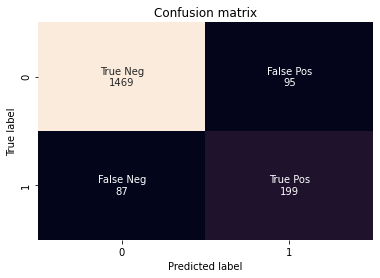

precision-recall curve: 


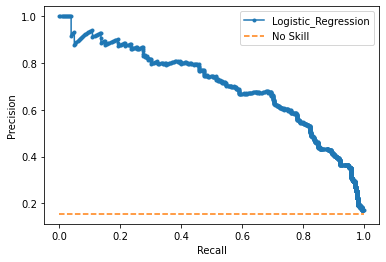

Printing the parameters of the models: {'C': 0.1, 'class_weight': {0: 0.442, 1: 0.568}, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 2, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

RANDOM_FOREST
Train Score: 91 %
Test Score: 90 %
classification_report
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1564
           1       0.71      0.65      0.68       286

    accuracy                           0.90      1850
   macro avg       0.82      0.80      0.81      1850
weighted avg       0.90      0.90      0.90      1850

PR AUC Score : 74
Random_Forest Confusion matrix :


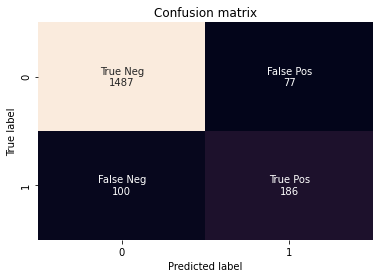

precision-recall curve: 


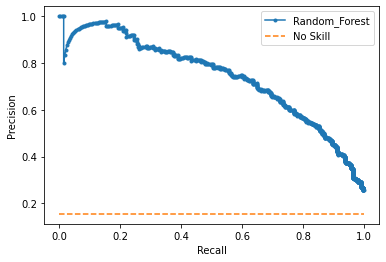

Printing the parameters of the models: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {0: 0.453, 1: 0.557}, 'criterion': 'gini', 'max_depth': 5, 'max_features': 21, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 83, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}

XGBOOST
Train Score: 95 %
Test Score: 89 %
classification_report
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1564
           1       0.62      0.77      0.69       286

    accuracy                           0.89      1850
   macro avg       0.79      0.84      0.81      1850
weighted avg       0.90      0.89      0.90      1850

PR AUC Score : 72
XGBoost Confusion matrix :


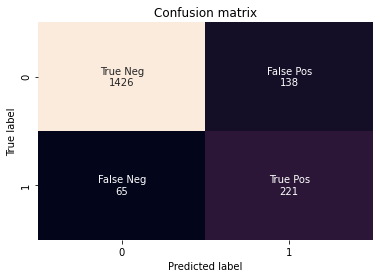

precision-recall curve: 


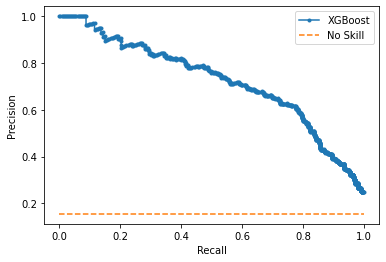

Printing the parameters of the models: {'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 3, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.35, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 3, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 110, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 5.455, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [64]:
models_tuned ={'Logistic_Regression':LogisticRegression(C=0.1,solver="lbfgs",
                                     class_weight={0:0.442, 1:0.568},penalty= 'l2', random_state=2),
               "Random_Forest":RandomForestClassifier(class_weight={0:0.453, 1:0.557}, random_state=2,n_estimators=83,
                                                 max_depth=5,max_features=21,criterion="gini",min_samples_split=2,
                                                 min_samples_leaf=2),
               'XGBoost':xgb.XGBClassifier(scale_pos_weight=5.455,
                                random_state=2,n_estimators=110,gamma=3,min_child_weight=3,max_depth= 6,
                                colsample_bytree= 1,learning_rate= 0.35,subsample= 1)}


for name,algo in models_tuned.items():
    model_metrics(name,algo,X_train,y_train,X_test,y_test)

Inference:

Based on our mean score of performance f1, Xgboost and Logistic regression seem to be the best classifiers with having the same f1 score of 69%. Depending on what matters the most for the client, the most appropriate classifier can be chosen. If the subject in the matter is to maximize recall, minimize the number of real purchases predicted as not purchase then Xgboost with 77% recall is suggested. If the cost of actual no purchases classified as purchases is considered more important from the client, then the Logistic regression with 68% precision is suggested.

Comparing the difference between the training and the testing accuracy of all classifiers, small fluctuations can be noticed without over or underfitting as both numbers are around 90%. Thus, we can conclude that the models generalize well at unseen data while still performing well overall. 

Calculating the precision, recall and f1 scores for both training and testing data shows that these values vary, with higher values at training and lower values at the testing set. Also, the test set values are lower than accuracy, which means that all models predict the minority class less accurately than the majority. Therefore resampling techiques will be tested to find the optimal method and model for the given dataset.

# 4 Resampling techniques

The main issue of imbalanced classification is that fewer examples of minority class impeded models to learn the decision boundaries effectively. Most models will ignore the minority class, the performance of which is most important, and focus on majority class. Thus, we cope with this problem of balancing the data and better training the models by applying resampling techniques for binary classification based on scientific literature. Resampling techniques are dealing with highly unbalanced datasets and are applied only to the training set. 

Two over-sampling and one under-sampling technique will be used to identify the optimal fitted resampling technique for the chosen model-2. While using resampling, the classifiers will not contain the attribute of weight_class. It also assesses the ratio between majority and minority class and will cancel out the resampling techniques. Balancing the distribution between minority and majority class can lead to overfitting the minority class and increasing the generalization error. Thus, all approaches will be repeated until the optimal class distribution is fund and lead us to the optimal f1 score of interest. Setting the "sampling_strategy" argument as the floating-point, we can define the ratio(percentage) between the class distributions achieved on the training dataset. In over-sampling, the "sampling_strategy" impacts the minority class instead of the majority class and vice versa.

## 4.1.1 Random Over Sampling

Random oversampling and random under-sampling are the simplest way of over-sampling and under-sampling, respectively.  They do not make assumptions about the data and their heuristics usage, making their implementation easy and their execution fast. Those characteristics are desirable for this large dataset.

Random oversampling is useful for models that seek good splits of the data like decision tree-based models and characterised by skewed distributions, making the technic compatible with the chosen classifiers. This technique randomly duplicate examples of the minority class, but do not add any new information to the model and can cause overfitting.

In [116]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros = RandomOverSampler(random_state=27, sampling_strategy=0.35)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

#counte the random over-sampling and original set shape:
print("original dataset shape{}".format(pd.Series(y_train).value_counts()))
print("sm dataset shape{}".format(pd.Series(y_train_ros).value_counts()))


original dataset shape0    8858
1    1622
Name: Revenue, dtype: int64
sm dataset shape0    8858
1    3100
Name: Revenue, dtype: int64


## 4.1.2 Tuning and cross-validation 

### Logistic regression

In [117]:
#Instantiate the logistic regression classifier: 
logreg = LogisticRegression(random_state=2)
 

#Create the hyperparameter grid:
logreg_param = {'C':[0.001,0.1,1], 'penalty': ['l1', 'l2'],
                "solver":['liblinear', "newton-cg", "sag", "saga", "lbfgs"]} 

#Create the repeated cross validation grid:
logreg_cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Instantiate the GridSearchCV object: 
logreg_gridcv = GridSearchCV(
        estimator=logreg,
        param_grid=logreg_param,
        scoring='f1',
        n_jobs=-1,
        cv=logreg_cv,
        verbose=1)
 
logreg_gridcv.fit(X_train_ros, y_train_ros)

#Print the optimal parameters and best score:
print("Tuned Logistic Regression Hyperparameters: {}".format(logreg_gridcv.best_params_))
print("Tuned Logistic Regression Best Score: {}".format(logreg_gridcv.best_score_))

Fitting 30 folds for each of 30 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 870 tasks      | elapsed:   17.5s


Tuned Logistic Regression Hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Best Score: 0.7569937937493653


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   18.6s finished


### Random Forest

In [118]:
#Instantiate the Random Forest classifier: 
rf = RandomForestClassifier(random_state=2)

#Create the hyperparameter grid:
rf_param = {'n_estimators':[78,90],
            'max_depth': [2,8], 
            'max_features': [21,25],
            "criterion":[ "gini","entropy"],
            'min_samples_split':[4,6],
             "min_samples_leaf" : [2,8]}


#Create the repeated cross validation grid:
rf_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

#Instantiate the GridSearchCV object:
rf_gridcv=GridSearchCV(
        estimator=rf,
        param_grid=rf_param,
        scoring='f1',
        n_jobs=-1, 
        cv=rf_cv,
        verbose=1)

rf_gridcv.fit(X_train_ros, y_train_ros)

#Print the optimal parameters and best score:
print("Tuned Random Forest  Hyperparameters: {}".format(rf_gridcv.best_params_))
print("Tuned Random Forest  Best Score: {}".format(rf_gridcv.best_score_))

Fitting 30 folds for each of 64 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  4.5min finished


Tuned Random Forest  Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 25, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 78}
Tuned Random Forest  Best Score: 0.781706891460351


### Xgboost

In [119]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#Instantiate the Xgboost classifier: 
gbm = xgb.XGBClassifier(random_state=2)

#Create the hyperparameter grid:
gbm_param = {"colsample_bytree":[ 0.8, 1], 
                  "learning_rate": [0.28, 0.35] ,
                  "max_depth":[4,5],
                  'min_child_weight': [3,4],
                  'gamma': [3,3],
                  'subsample': [0.8,1.0], 
                   "n_estimators":[80,95]}


#Create the repeated cross validation grid:
gbm_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
          
#Instantiate the GridSearchCV object:
gbm_gridcv = GridSearchCV(estimator=gbm, 
                        param_grid=gbm_param,
                        scoring='f1',
                        n_jobs=-1,
                        cv=gbm_cv,
                        verbose=1)

gbm_gridcv.fit(X_train_ros, y_train_ros)

#Print the optimal parameters and best score:
print("Tuned XGB Hyperparameters: {}".format(gbm_gridcv.best_params_))
print("Tuned XGB Best Score: {}".format(gbm_gridcv.best_score_))

Fitting 30 folds for each of 128 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 20.8min finished


Tuned XGB Hyperparameters: {'colsample_bytree': 1, 'gamma': 3, 'learning_rate': 0.35, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 95, 'subsample': 0.8}
Tuned XGB Best Score: 0.8106930222759744


## 4.1.3 Initialize models and models' performance after tuning


LOGISTIC_REGRESSION
Train Score: 87 %
Test Score: 87 %
classification_report
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      1564
           1       0.56      0.78      0.65       286

    accuracy                           0.87      1850
   macro avg       0.76      0.84      0.79      1850
weighted avg       0.90      0.87      0.88      1850

PR AUC Score : 69
Logistic_Regression Confusion matrix :


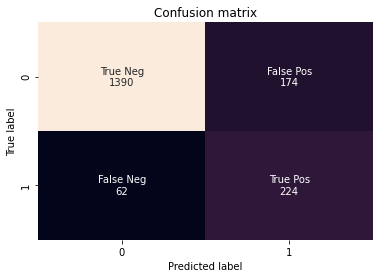

precision-recall curve: 


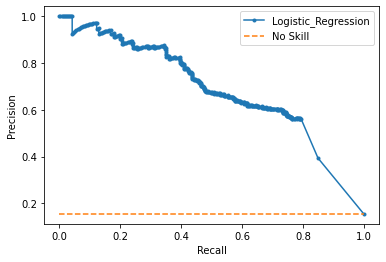

Printing the parameters of the models: {'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

RANDOM_FOREST
Train Score: 91 %
Test Score: 90 %
classification_report
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1564
           1       0.66      0.72      0.69       286

    accuracy                           0.90      1850
   macro avg       0.80      0.83      0.81      1850
weighted avg       0.90      0.90      0.90      1850

PR AUC Score : 75
Random_Forest Confusion matrix :


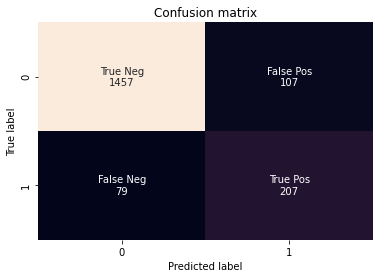

precision-recall curve: 


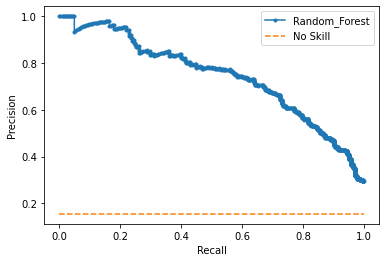

Printing the parameters of the models: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 25, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 78, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}

XGBOOST
Train Score: 95 %
Test Score: 90 %
classification_report
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1564
           1       0.66      0.67      0.67       286

    accuracy                           0.90      1850
   macro avg       0.80      0.80      0.80      1850
weighted avg       0.90      0.90      0.90      1850

PR AUC Score : 71
XGBoost Confusion matrix :


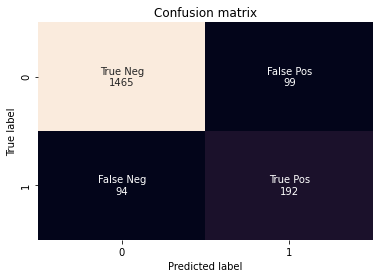

precision-recall curve: 


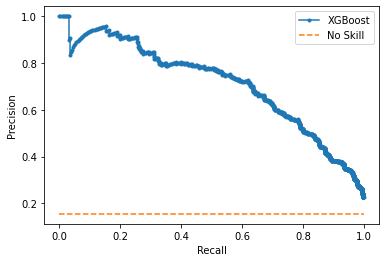

Printing the parameters of the models: {'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 3, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.35, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 3, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 95, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [120]:
models_ros_tuned ={'Logistic_Regression':LogisticRegression(C=0.001,solver="liblinear", penalty= 'l1', random_state=2),
                    "Random_Forest":RandomForestClassifier( random_state=2,n_estimators=78,max_depth=8,
                                max_features=25,criterion="gini",min_samples_split=6,min_samples_leaf=2),
                    "XGBoost":xgb.XGBClassifier(random_state=2,n_estimators=95,gamma=3,min_child_weight=3,max_depth= 5,
                                colsample_bytree= 1,learning_rate= 0.35,subsample= 0.8)}
               
           

for name,algo in models_ros_tuned.items():
    model_metrics(name,algo,X_train_ros,y_train_ros,X_test,y_test)

## 4.2.1 Random Under Sampling

Random undersampling can be useful for models that although there is a class imbalance, the number of observations of minority class are enough to fit the chosen model appropriately. Random under-sampling removes observations from the majority class. This makes the data easy to train but can cause loss of valuable information, critical for fitting a robust decision boundary, and underfitting as the randomly chosen sample may be a biased sample and, thus, poorly generalize the test set. The original data set contains 10,480 observations and the under-sampled 6,537 with precisely the same number of minority examples. As the chosen under sampled set is more than 50%of, the original observation is thought to be sufficient to train a model.

In [121]:
rus = RandomUnderSampler(random_state=27,sampling_strategy=0.33)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

#counte the sm and original set
print("original dataset shape{}".format(pd.Series(y_train).value_counts()))
print("sm dataset shape{}".format(pd.Series(y_train_rus).value_counts()))


original dataset shape0    8858
1    1622
Name: Revenue, dtype: int64
sm dataset shape0    4915
1    1622
Name: Revenue, dtype: int64


## 4.2.2 Tunging and cross validation 

### Logistic regression

In [122]:
#Instantiate the logistic regression classifier: 
logreg = LogisticRegression(random_state=2)

#Create the hyperparameter grid:
logreg_param = {'C':[0.001,0.1,1], 'penalty': ['l1', 'l2'],
                "solver":['liblinear', "newton-cg", "sag", "saga", "lbfgs"]} 

#Create the repeated cross validation grid:
logreg_cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Instantiate the GridSearchCV object:
logreg_gridcv = GridSearchCV(
        estimator=logreg,
        param_grid=logreg_param,
        scoring='f1',
        n_jobs=-1,
        cv=logreg_cv,
        verbose=1)
 
logreg_gridcv.fit(X_train_rus, y_train_rus)

#Print the optimal parameters and best score:
print("Tuned Logistic Regression Hyperparameters: {}".format(logreg_gridcv.best_params_))
print("Tuned Logistic Regression Best Score: {}".format(logreg_gridcv.best_score_))

Fitting 30 folds for each of 30 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 877 out of 900 | elapsed:    9.2s remaining:    0.2s


Tuned Logistic Regression Hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Best Score: 0.7483006643476727


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    9.4s finished


### Random Forest

In [123]:
#Instantiate the Random Forest classifier: 
rf = RandomForestClassifier(random_state=2)

#Create the hyperparameter grid:
rf_param = {'n_estimators':[83,90],
            'max_depth': [5,7], 
            'max_features': [17,21],
            "criterion":[ "gini","entropy"],
            'min_samples_split':[7,8],
             "min_samples_leaf" : [6,9] }


#Create the repeated cross validation grid:
rf_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

#Instantiate the GridSearchCV object:
rf_gridcv=GridSearchCV(
        estimator=rf,
        param_grid=rf_param,
        scoring='f1',
        n_jobs=-1, 
        cv=rf_cv,
        verbose=1)

rf_gridcv.fit(X_train_rus, y_train_rus)

#Print the optimal parameters and best score
print("Tuned Random Forest  Hyperparameters: {}".format(rf_gridcv.best_params_))
print("Tuned Random Forest  Best Score: {}".format(rf_gridcv.best_score_))

Fitting 30 folds for each of 64 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  2.5min finished


Tuned Random Forest  Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 21, 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 83}
Tuned Random Forest  Best Score: 0.754427458421429


### Xgboost

In [124]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#Instantiate the Xgboost classifier: 
gbm = xgb.XGBClassifier(random_state=2)

#Create the hyperparameter grid:
gbm_param = {"colsample_bytree":[ 0.3, 1], 
                  "learning_rate": [0.28,0.35] ,
                  "max_depth":[4,5],
                  'min_child_weight': [3,4],
                  'gamma': [2,3],
                  'subsample': [0.3, 1.0], 
                  "n_estimators":[80,100]} 

#Create the repeated cross validation grid:
gbm_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
          
#Instantiate the GridSearchCV object: 
gbm_gridcv = GridSearchCV(estimator=gbm, 
                        param_grid=gbm_param,
                        scoring='f1',
                        n_jobs=-1,
                        cv=gbm_cv,
                        verbose=1)

gbm_gridcv.fit(X_train_rus,y_train_rus)

#Print the optimal parameters and best score:
print("Tuned XGB Hyperparameters: {}".format(gbm_gridcv.best_params_))
print("Tuned XGB Best Score: {}".format(gbm_gridcv.best_score_))

Fitting 30 folds for each of 128 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned XGB Hyperparameters: {'colsample_bytree': 1, 'gamma': 3, 'learning_rate': 0.35, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 80, 'subsample': 1.0}
Tuned XGB Best Score: 0.7400244919125929


## 4.2.3 Initialize models and models' performance after tuning


LOGISTIC_REGRESSION
Train Score: 87 %
Test Score: 87 %
classification_report
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      1564
           1       0.56      0.79      0.66       286

    accuracy                           0.87      1850
   macro avg       0.76      0.84      0.79      1850
weighted avg       0.90      0.87      0.88      1850

PR AUC Score : 65
Logistic_Regression Confusion matrix :


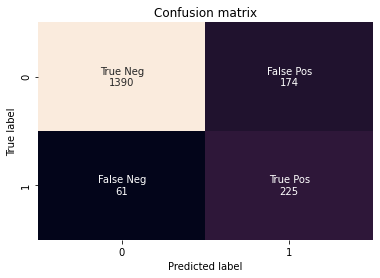

precision-recall curve: 


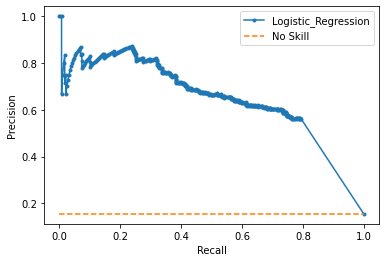

Printing the parameters of the models: {'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

RANDOM_FOREST
Train Score: 88 %
Test Score: 89 %
classification_report
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1564
           1       0.63      0.73      0.68       286

    accuracy                           0.89      1850
   macro avg       0.79      0.83      0.81      1850
weighted avg       0.90      0.89      0.90      1850

PR AUC Score : 75
Random_Forest Confusion matrix :


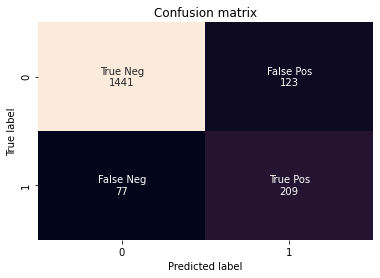

precision-recall curve: 


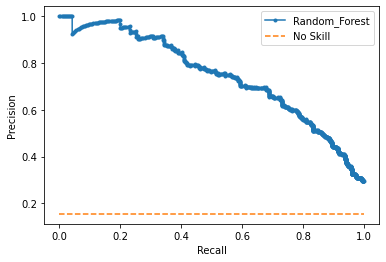

Printing the parameters of the models: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 21, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 9, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 83, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}

XGB
Train Score: 91 %
Test Score: 90 %
classification_report
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1564
           1       0.65      0.70      0.67       286

    accuracy                           0.90      1850
   macro avg       0.80      0.82      0.81      1850
weighted avg       0.90      0.90      0.90      1850

PR AUC Score : 74
XGB Confusion matrix :


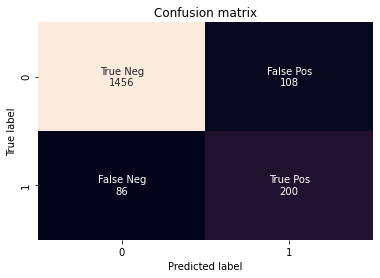

precision-recall curve: 


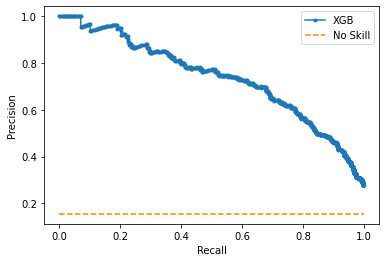

Printing the parameters of the models: {'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 3, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.35, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 80, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [125]:

models_rus_tuned ={'Logistic_Regression':LogisticRegression(C=0.001,solver="liblinear", penalty= 'l1', random_state=2),
                    "Random_Forest":RandomForestClassifier( random_state=2,n_estimators=83,max_depth=5,
                                max_features=21,criterion="entropy",min_samples_split=7,min_samples_leaf=9),
                    "XGB":xgb.XGBClassifier(random_state=2,n_estimators=80,gamma=3,min_child_weight=4,max_depth= 5,
                                colsample_bytree= 1,learning_rate= 0.35,subsample= 1)}
               
           

for name,algo in models_rus_tuned.items():
    model_metrics(name,algo,X_train_rus,y_train_rus,X_test,y_test)

## 4.3. Synthetic Minority Oversampling Technique(SMOTE) Oversampling

SMOTE is a more sophisticated technique of augmentation as it does not create duplicate observations.SMOTE generates new synthetic samples for the minority class by using the nearest neighbours algorithm to generate them. It may create over-fitting, as do not consider the majority class, and noise if the purchasing cases are not distinct and are quite similar to each other(overlap between positive and negative classes) as the nearest neighbours necessarily create more positive purchasing cases.

In [126]:
from imblearn.over_sampling import SMOTE

#Generating our synthetic data points
sm = SMOTE(random_state=27, sampling_strategy=0.29)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

#counte the sm and original set
print("original dataset shape{}".format(pd.Series(y_train).value_counts()))
print("sm dataset shape{}".format(pd.Series(y_train_sm).value_counts()))


original dataset shape0    8858
1    1622
Name: Revenue, dtype: int64
sm dataset shape0    8858
1    2568
Name: Revenue, dtype: int64


## 4.3.2 Tuning and cross-validation 

### Logistic regression

In [127]:
#Instantiate the logistic regression classifier: 
logreg = LogisticRegression(random_state=2)

#Create the hyperparameter grid:
logreg_param = {'C':[0.001,0.01,0.1,1], 'penalty': ['l1', 'l2'],
                "solver":['liblinear', "newton-cg", "sag", "saga", "lbfgs"]}
                 

#Create the repeated cross validation grid:
logreg_cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Instantiate the GridSearchCV object: 
logreg_gridcv = GridSearchCV(
        estimator=logreg,
        param_grid=logreg_param,
        scoring='f1',
        n_jobs=-1,
        cv=logreg_cv,
        verbose=1)
 
logreg_gridcv.fit(X_train_sm, y_train_sm)

#Print the optimal parameters and best score:
print("Tuned Logistic Regression Hyperparameters: {}".format(logreg_gridcv.best_params_))
print("Tuned Logistic Regression Best Score: {}".format(logreg_gridcv.best_score_))

Fitting 30 folds for each of 40 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 966 tasks      | elapsed:   11.9s


Tuned Logistic Regression Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Best Score: 0.7353532265172427


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   18.8s finished


### Random Forest

In [130]:
#Instantiate the Random Forest classifier: 
rf = RandomForestClassifier(random_state=2)


# #Create the hyperparameter grid:
rf_param = {'n_estimators':[83,90],
            'max_depth': [5,7,9], 
            'max_features': [21,25],
            "criterion":["gini", "entropy"],
            'min_samples_split':[4,9],
             "min_samples_leaf" : [7,9]}

#Create the repeated cross validation grid:
rf_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

#Instantiate the GridSearchCV object:
rf_gridcv=GridSearchCV(
        estimator=rf,
        param_grid=rf_param,
        scoring='f1',
        n_jobs=-1, 
        cv=rf_cv,
        verbose=1)

rf_gridcv.fit(X_train_sm, y_train_sm)

#Print the optimal parameters and best score:
print("Tuned Random Forest  Hyperparameters: {}".format(rf_gridcv.best_params_))
print("Tuned Random Forest  Best Score: {}".format(rf_gridcv.best_score_))

Fitting 30 folds for each of 96 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  8.3min finished


Tuned Random Forest  Hyperparameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 21, 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 83}
Tuned Random Forest  Best Score: 0.7436728901055095


### Xgboost

In [132]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#Instantiate the Xgboost classifier:
gbm = xgb.XGBClassifier(random_state=2)

#Create the hyperparameter grid:
gbm_param = {"colsample_bytree":[ 0.8, 1], 
                  "learning_rate": [0.28,0.35] ,
                  "max_depth":[3,6],
                  'min_child_weight': [4,5],
                  'gamma': [3, 5],
                  'subsample': [0.8, 1.0], 
                    "n_estimators":[80,90]} 

#Create the repeated cross validation grid:
gbm_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
          
#Instantiate the GridSearchCV object: 
gbm_gridcv = GridSearchCV(estimator=gbm, 
                        param_grid=gbm_param,
                        scoring='f1',
                        n_jobs=-1,
                        cv=gbm_cv,
                        verbose=1)

gbm_gridcv.fit(X_train_sm, y_train_sm)

#Print the optimal parameters and best score:
print("Tuned XGB Hyperparameters: {}".format(gbm_gridcv.best_params_))
print("Tuned XGB Best Score: {}".format(gbm_gridcv.best_score_))

Fitting 30 folds for each of 128 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 19.2min finished


Tuned XGB Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.28, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 90, 'subsample': 0.8}
Tuned XGB Best Score: 0.7597022152498466


## 4.3.3 Initialize models and models' performance after tuning


LOGISTIC_REGRESSION
Train Score: 87 %
Test Score: 88 %
classification_report
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      1564
           1       0.58      0.77      0.66       286

    accuracy                           0.88      1850
   macro avg       0.77      0.83      0.79      1850
weighted avg       0.90      0.88      0.89      1850

PR AUC Score : 70
Logistic_Regression Confusion matrix :


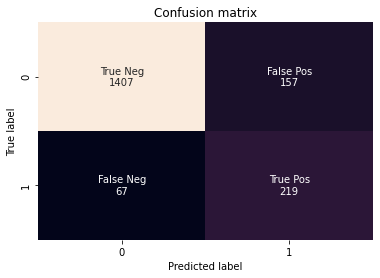

precision-recall curve: 


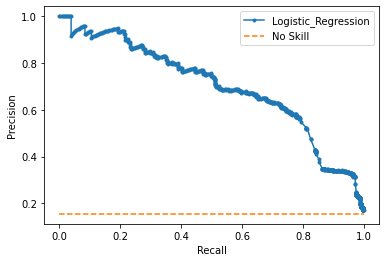

Printing the parameters of the models: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 2, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

RANDOM_FOREST
Train Score: 91 %
Test Score: 90 %
classification_report
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1564
           1       0.68      0.70      0.69       286

    accuracy                           0.90      1850
   macro avg       0.81      0.82      0.82      1850
weighted avg       0.90      0.90      0.90      1850

PR AUC Score : 74
Random_Forest Confusion matrix :


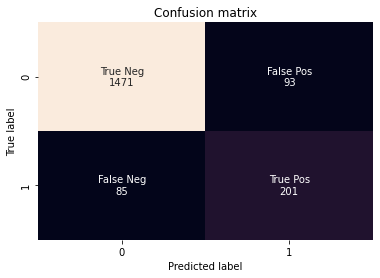

precision-recall curve: 


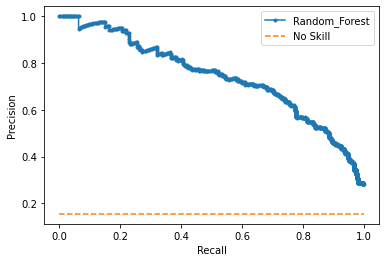

Printing the parameters of the models: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 21, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 7, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 83, 'n_jobs': None, 'oob_score': False, 'random_state': 2, 'verbose': 0, 'warm_start': False}

XGB
Train Score: 93 %
Test Score: 90 %
classification_report
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1564
           1       0.69      0.62      0.65       286

    accuracy                           0.90      1850
   macro avg       0.81      0.78      0.80      1850
weighted avg       0.89      0.90      0.90      1850

PR AUC Score : 73
XGB Confusion matrix :


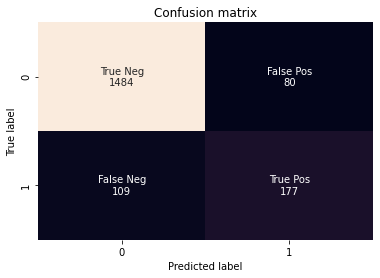

precision-recall curve: 


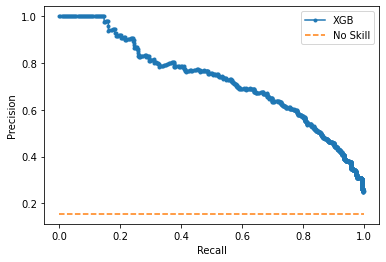

Printing the parameters of the models: {'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 5, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.28, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 4, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 90, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [133]:
models_smote_tuned ={'Logistic_Regression':LogisticRegression(C=0.01,solver="liblinear", penalty= 'l1', random_state=2),
                    "Random_Forest":RandomForestClassifier( random_state=2,n_estimators=83,max_depth=9,
                                max_features=21,criterion="gini",min_samples_split=4,min_samples_leaf=7),
                    "XGB":xgb.XGBClassifier(random_state=2,n_estimators=90,gamma=5,min_child_weight=4,max_depth= 6,
                                colsample_bytree= 0.8,learning_rate= 0.28,subsample= 0.8)}
               
           

for name,algo in models_smote_tuned.items():
    model_metrics(name,algo,X_train_sm,y_train_sm,X_test,y_test)

## 4.4 Resampling techniques overall inferences

Inference:

Logistic-regression developed the highest scores in F1 66% and Precision-recall AUC 70%  with SMOTE . Random Forest  and Xgboost performed best with random over-sampling with F1 69%, Precision-recall AUC 75%, Recall of 72%  and   F1 67%, Precision-recall AUC 71% respectively. All resampling techniques have small differences in their score values without outweighing each other.




